Fashion MNIST ex_2
Submitted by : 
Ahigad Genish 316228022
Omer Sela 316539535

Creating a LR and NN model from scratch for classify MNIST Fashion images.

How to run the Code ?
Run all sections from the begining, the first part is visualiaing the data.
Please replace the data iamges path to your relative path in all relevant sections.

In part 1 just run and the images of the classes will appear.
In part 2 - Section A contatins a definition of the Logistic regression model with no paramters tuning.
          - Section B is paramter tuning of the LR model and each one will show the best hyperparamter.
          - Section C will show the combination of the best hyperparamters and the result.
In part 3 - Section A contatins a definition of the NN model with no paramters tuning.
          - Section B is paramter tuning of the NN model and each one will show the best hyperparamter.
          - Section C will show the combination of the best hyperparamters and the result.

Part 1 - Visualize the Data


In [ ]:
# part 1: Visualize the Data plot 4 different examples from each class in a grid of 10x4

In [40]:
import pandas as pd
import numpy as np
import os

IMAGE_PATH = os.path.join(os.getcwd(),'MNISTFashion_Data\\train.csv')
df = pd.read_csv(IMAGE_PATH)

# Display the DataFrame
df.head(10)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,2,...,0,0,0,6,217,220,141,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,75,74,109,55,0,3,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,2,...,29,22,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,24,176,146,69,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,41,0,0,0,0,0,0,0,0,0


In [ ]:
# part 1: Visualize the Data plot 4 different examples from each class - images

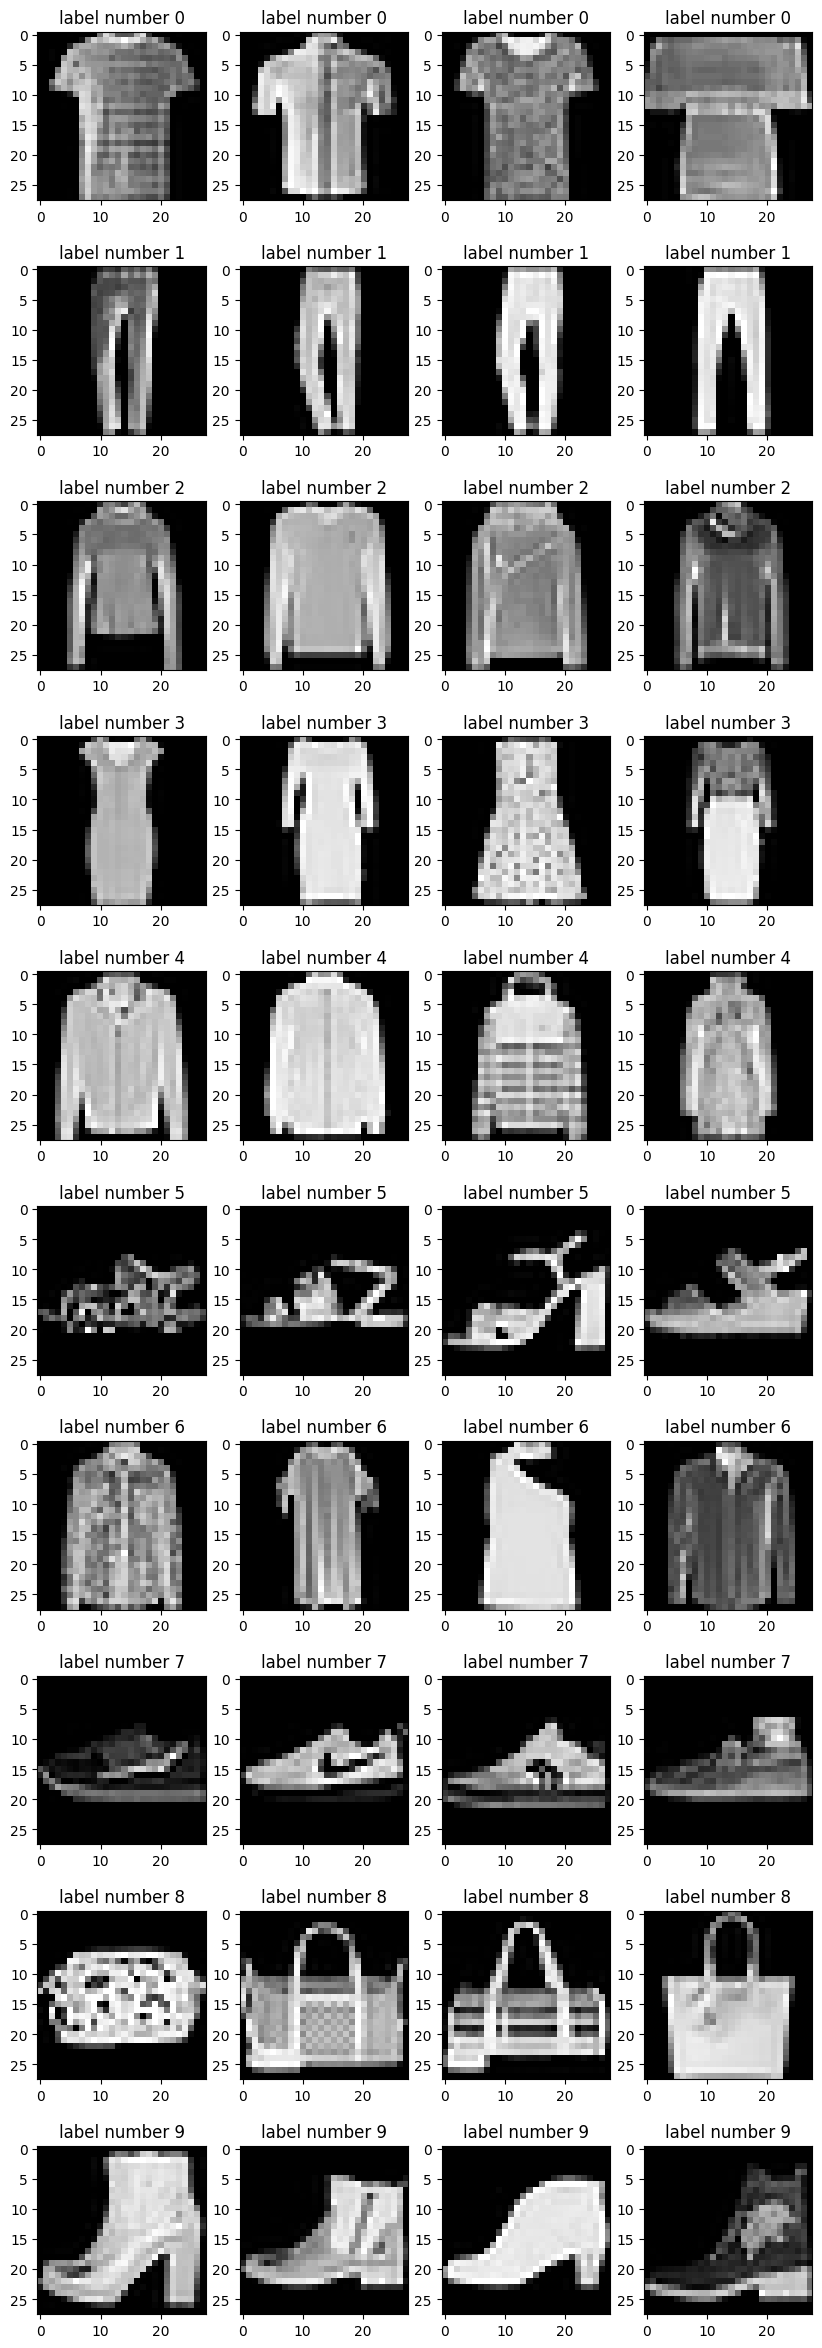

In [41]:
import matplotlib.pyplot as plt


x = df.iloc[:,1:].values
y = df['label'].values # Take the values of the labels
plt.figure(figsize=(10,30))
for label_num in range(0,10):
    # First, find 4 examples of the said label
    curr_data = x[y==label_num][0:4]
    for pic_num in range(4):
        plt.subplot(10,4, (pic_num+1) +label_num*4)
        plt.title('label number {}'.format(label_num))
        # We will reshape the image to a 28x28 2D array
        plt.imshow(np.reshape(curr_data[pic_num],(28,28)),'gray')


Part 2 - Logisitic Regression Model

In [ ]:
# Part 2: Section A 
# Contatins a definition of the Logistic regression model with no paramters tuning.

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

TRAIN_IMAGE_PATH = os.path.join(os.getcwd(),'MNISTFashion_Data\\train.csv')
TEST_IMAGE_PATH = os.path.join(os.getcwd(),'MNISTFashion_Data\\test.csv')
# Load data
train_data = pd.read_csv(TRAIN_IMAGE_PATH)
test_data = pd.read_csv(TEST_IMAGE_PATH)

# Split train data into train and validation sets
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42)

# Normalize the data based on training set
train_set_features = train_set.drop('label', axis=1) / 255.0
val_set_features = val_set.drop('label', axis=1) / 255.0
test_data_features = test_data / 255.0

# Convert labels to one-hot encoding
train_set_labels = pd.get_dummies(train_set['label']).values
val_set_labels = pd.get_dummies(val_set['label']).values

# Define softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define logistic regression model
class LogisticRegression:
    def __init__(self, num_features, num_classes, learning_rate=0.01, regularization='l2', reg_strength=0.1):
        self.num_features = num_features
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)
    
    def forward(self, X):
        logits = np.dot(X, self.weights) + self.bias
        return softmax(logits)
    
    def compute_loss(self, y_pred, y_true):
        loss = -np.mean(y_true * np.log(y_pred + 1e-9))
        if self.regularization == 'l2':
            reg_term = self.reg_strength * np.sum(self.weights )** 2
        elif self.regularization == 'l1':
            reg_term = self.reg_strength * np.sum(np.abs(self.weights))
        else:
            reg_term = 0
        return loss + reg_term
    
    def compute_gradients(self, X, y_pred, y_true):
        num_examples = X.shape[0]
        error = y_pred - y_true
        dW = np.dot(X.T, error) / num_examples
        db = np.sum(error, axis=0) / num_examples
        if self.regularization == 'l2':
            dW += self.reg_strength * self.weights
        elif self.regularization == 'l1':
            dW += self.reg_strength * np.sign(self.weights)
        return dW, db
    
    def update_parameters(self, dW, db):
        self.weights -= self.learning_rate * dW
        self.bias -= self.learning_rate * db
    
    def train(self, X, y, epochs, batch_size, validation_data):
        val_loss_history = []
        val_acc_history = []
        for epoch in range(epochs):
            # Shuffle training data
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            # Mini-batch gradient descent
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                y_pred = self.forward(X_batch)
                dW, db = self.compute_gradients(X_batch, y_pred, y_batch)
                self.update_parameters(dW, db)
            # Compute validation loss and accuracy
            val_pred = self.forward(validation_data[0])
            val_loss = self.compute_loss(val_pred, validation_data[1])
            val_loss_history.append(val_loss)
            val_acc = self.compute_accuracy(val_pred, validation_data[1])
            val_acc_history.append(val_acc)
            print(f"Epoch {epoch+1}/{epochs} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_acc:.4f}")
        return val_loss_history, val_acc_history
    
    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)
    
    def compute_accuracy(self, y_pred, y_true):
        correct_predictions = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))
        total_examples = y_pred.shape[0]
        return correct_predictions / total_examples



Epoch 1/100 - Validation Loss: 0.0982 - Validation Accuracy: 0.7024
Epoch 2/100 - Validation Loss: 0.0880 - Validation Accuracy: 0.7386
Epoch 3/100 - Validation Loss: 0.0844 - Validation Accuracy: 0.7608
Epoch 4/100 - Validation Loss: 0.0828 - Validation Accuracy: 0.7668
Epoch 5/100 - Validation Loss: 0.0818 - Validation Accuracy: 0.7727
Epoch 6/100 - Validation Loss: 0.0812 - Validation Accuracy: 0.7745
Epoch 7/100 - Validation Loss: 0.0807 - Validation Accuracy: 0.7807
Epoch 8/100 - Validation Loss: 0.0805 - Validation Accuracy: 0.7838
Epoch 9/100 - Validation Loss: 0.0802 - Validation Accuracy: 0.7836
Epoch 10/100 - Validation Loss: 0.0799 - Validation Accuracy: 0.7858
Epoch 11/100 - Validation Loss: 0.0797 - Validation Accuracy: 0.7853
Epoch 12/100 - Validation Loss: 0.0795 - Validation Accuracy: 0.7865
Epoch 13/100 - Validation Loss: 0.0794 - Validation Accuracy: 0.7871
Epoch 14/100 - Validation Loss: 0.0792 - Validation Accuracy: 0.7889
Epoch 15/100 - Validation Loss: 0.0790 - Va

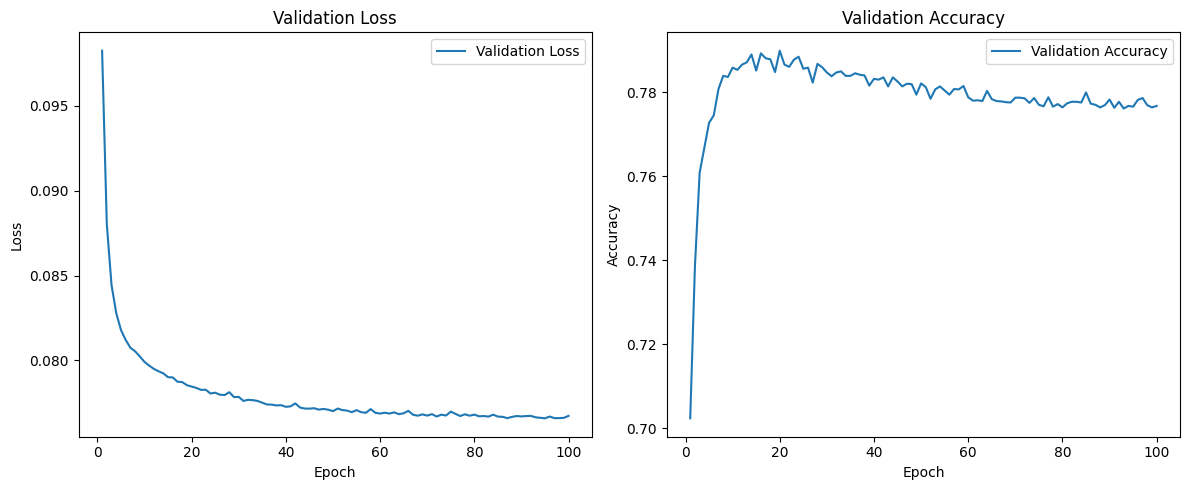

In [44]:
# Plot loss and accuracy curves
import matplotlib.pyplot as plt

# Initialize and train the model
num_features = train_set_features.shape[1]
num_classes = train_set_labels.shape[1]
model = LogisticRegression(num_features, num_classes, learning_rate=0.01, regularization='l2', reg_strength=0.1)
val_loss_history, val_acc_history = model.train(train_set_features.values, train_set_labels, epochs=100, batch_size=128, validation_data=(val_set_features.values, val_set_labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on test set
predictions = model.predict(test_data_features.values)

# Save predictions to a file
np.savetxt('lr_pred.csv', predictions, fmt='%d')


In [ ]:
# Part 2 Section B is paramter tuning of the LR model and each one will show the best hyperparamter.
# Parameters tuning - Logistic Regression:

In [45]:
# Plot loss and accuracy curves
import matplotlib.pyplot as plt

# Initialize and train the model
num_features = train_set_features.shape[1]
num_classes = train_set_labels.shape[1]
learning_rate = [0.05, 0.01, 0.001]
reg_strength = [0.02, 0.1, 0.5]
batch_size = [64, 512, 2048]



learning rate:  0.05
Epoch 1/100 - Validation Loss: 0.0735 - Validation Accuracy: 0.7807
Epoch 2/100 - Validation Loss: 0.0708 - Validation Accuracy: 0.7904
Epoch 3/100 - Validation Loss: 0.0704 - Validation Accuracy: 0.7908
Epoch 4/100 - Validation Loss: 0.0689 - Validation Accuracy: 0.7986
Epoch 5/100 - Validation Loss: 0.0686 - Validation Accuracy: 0.7939
Epoch 6/100 - Validation Loss: 0.0687 - Validation Accuracy: 0.7919
Epoch 7/100 - Validation Loss: 0.0682 - Validation Accuracy: 0.7965
Epoch 8/100 - Validation Loss: 0.0677 - Validation Accuracy: 0.7963
Epoch 9/100 - Validation Loss: 0.0678 - Validation Accuracy: 0.7938
Epoch 10/100 - Validation Loss: 0.0686 - Validation Accuracy: 0.7901
Epoch 11/100 - Validation Loss: 0.0678 - Validation Accuracy: 0.7926
Epoch 12/100 - Validation Loss: 0.0677 - Validation Accuracy: 0.7910
Epoch 13/100 - Validation Loss: 0.0673 - Validation Accuracy: 0.7931
Epoch 14/100 - Validation Loss: 0.0668 - Validation Accuracy: 0.7990
Epoch 15/100 - Validat

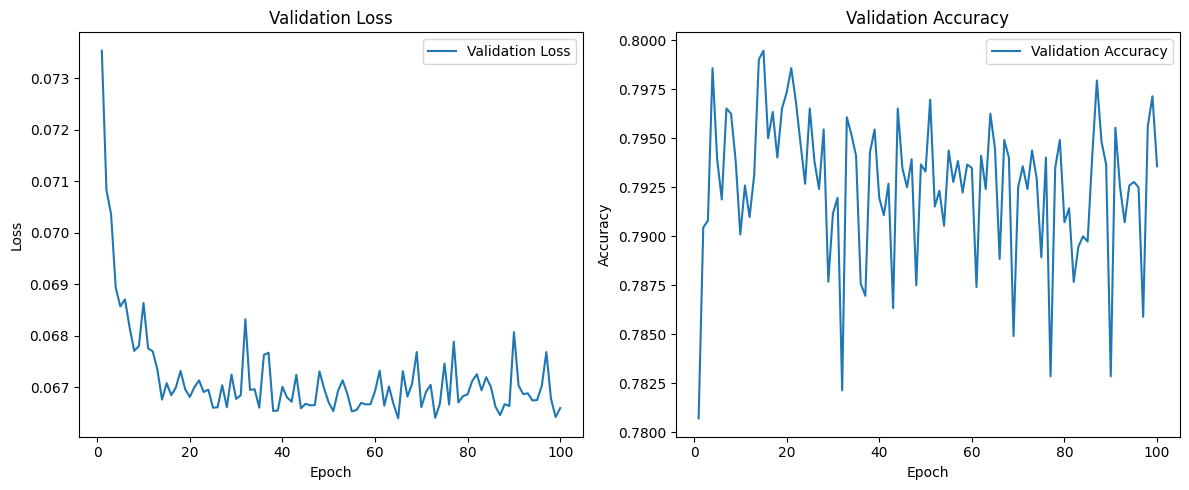

learning rate:  0.01
Epoch 1/100 - Validation Loss: 0.0948 - Validation Accuracy: 0.7023
Epoch 2/100 - Validation Loss: 0.0825 - Validation Accuracy: 0.7491
Epoch 3/100 - Validation Loss: 0.0776 - Validation Accuracy: 0.7643
Epoch 4/100 - Validation Loss: 0.0750 - Validation Accuracy: 0.7737
Epoch 5/100 - Validation Loss: 0.0734 - Validation Accuracy: 0.7854
Epoch 6/100 - Validation Loss: 0.0722 - Validation Accuracy: 0.7907
Epoch 7/100 - Validation Loss: 0.0715 - Validation Accuracy: 0.7921
Epoch 8/100 - Validation Loss: 0.0708 - Validation Accuracy: 0.7971
Epoch 9/100 - Validation Loss: 0.0703 - Validation Accuracy: 0.7952
Epoch 10/100 - Validation Loss: 0.0701 - Validation Accuracy: 0.7990
Epoch 11/100 - Validation Loss: 0.0697 - Validation Accuracy: 0.8003
Epoch 12/100 - Validation Loss: 0.0695 - Validation Accuracy: 0.8016
Epoch 13/100 - Validation Loss: 0.0693 - Validation Accuracy: 0.8000
Epoch 14/100 - Validation Loss: 0.0691 - Validation Accuracy: 0.8022
Epoch 15/100 - Validat

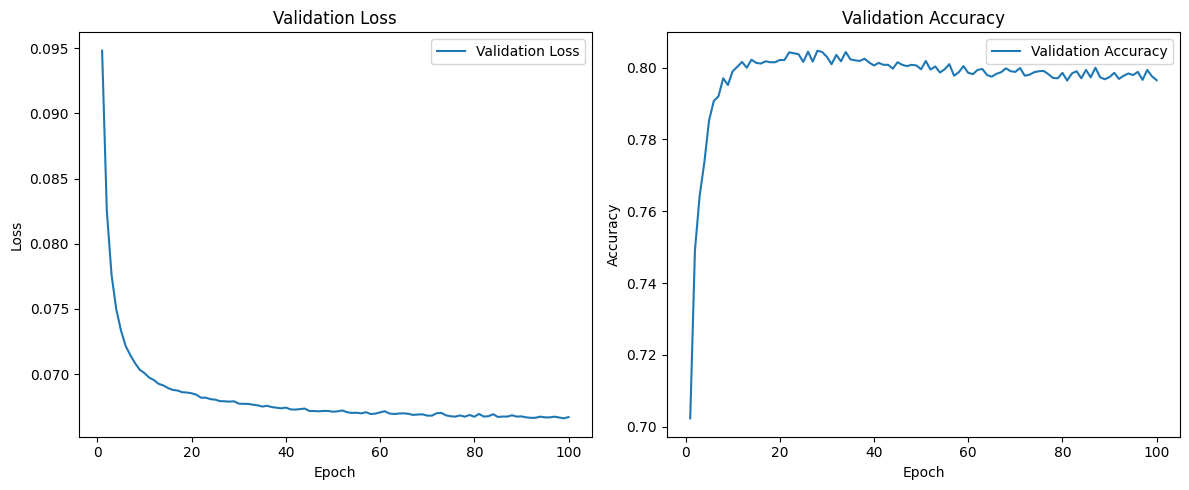

learning rate:  0.001
Epoch 1/100 - Validation Loss: 0.1752 - Validation Accuracy: 0.6498
Epoch 2/100 - Validation Loss: 0.1476 - Validation Accuracy: 0.6564
Epoch 3/100 - Validation Loss: 0.1313 - Validation Accuracy: 0.6596
Epoch 4/100 - Validation Loss: 0.1206 - Validation Accuracy: 0.6625
Epoch 5/100 - Validation Loss: 0.1132 - Validation Accuracy: 0.6687
Epoch 6/100 - Validation Loss: 0.1077 - Validation Accuracy: 0.6772
Epoch 7/100 - Validation Loss: 0.1034 - Validation Accuracy: 0.6846
Epoch 8/100 - Validation Loss: 0.1000 - Validation Accuracy: 0.6909
Epoch 9/100 - Validation Loss: 0.0971 - Validation Accuracy: 0.6987
Epoch 10/100 - Validation Loss: 0.0948 - Validation Accuracy: 0.7081
Epoch 11/100 - Validation Loss: 0.0928 - Validation Accuracy: 0.7126
Epoch 12/100 - Validation Loss: 0.0911 - Validation Accuracy: 0.7198
Epoch 13/100 - Validation Loss: 0.0896 - Validation Accuracy: 0.7246
Epoch 14/100 - Validation Loss: 0.0882 - Validation Accuracy: 0.7294
Epoch 15/100 - Valida

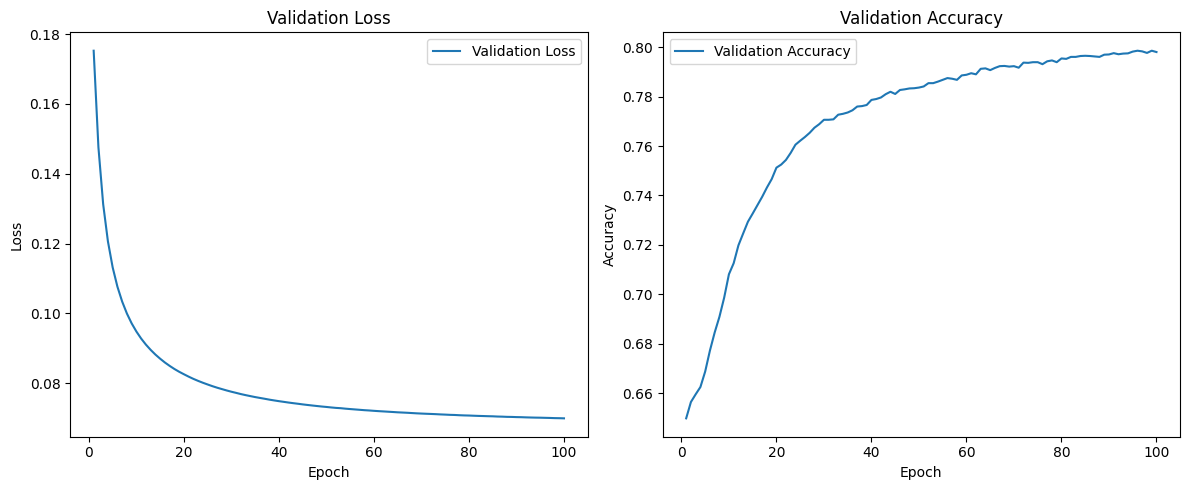

optimal lerning rate is:  0.001


In [46]:
# lerning rate choose parameters:
lr_max_value = learning_rate[0]
lr_max_accuracy = 0
for lr in learning_rate:
    print("learning rate: ", lr)
    model = LogisticRegression(num_features, num_classes, learning_rate=lr, regularization='l2', reg_strength=0.05)
    val_loss_history, val_acc_history = model.train(train_set_features.values, train_set_labels, epochs=100, batch_size=128, validation_data=(val_set_features.values, val_set_labels))
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    if val_acc_history[-1] > lr_max_accuracy:
        lr_max_accuracy = val_acc_history[-1]
        lr_max_value = lr
print ("optimal lerning rate is: ", lr_max_value)



Optimal paramter Learning Rate in LR Model lerning rate is:  0.001


reg_strength:  0.02
Epoch 1/100 - Validation Loss: 0.1751 - Validation Accuracy: 0.6461
Epoch 2/100 - Validation Loss: 0.1471 - Validation Accuracy: 0.6576
Epoch 3/100 - Validation Loss: 0.1305 - Validation Accuracy: 0.6598
Epoch 4/100 - Validation Loss: 0.1196 - Validation Accuracy: 0.6632
Epoch 5/100 - Validation Loss: 0.1119 - Validation Accuracy: 0.6694
Epoch 6/100 - Validation Loss: 0.1062 - Validation Accuracy: 0.6772
Epoch 7/100 - Validation Loss: 0.1018 - Validation Accuracy: 0.6852
Epoch 8/100 - Validation Loss: 0.0982 - Validation Accuracy: 0.6924
Epoch 9/100 - Validation Loss: 0.0952 - Validation Accuracy: 0.7033
Epoch 10/100 - Validation Loss: 0.0927 - Validation Accuracy: 0.7107
Epoch 11/100 - Validation Loss: 0.0906 - Validation Accuracy: 0.7166
Epoch 12/100 - Validation Loss: 0.0887 - Validation Accuracy: 0.7229
Epoch 13/100 - Validation Loss: 0.0871 - Validation Accuracy: 0.7262
Epoch 14/100 - Validation Loss: 0.0856 - Validation Accuracy: 0.7311
Epoch 15/100 - Validati

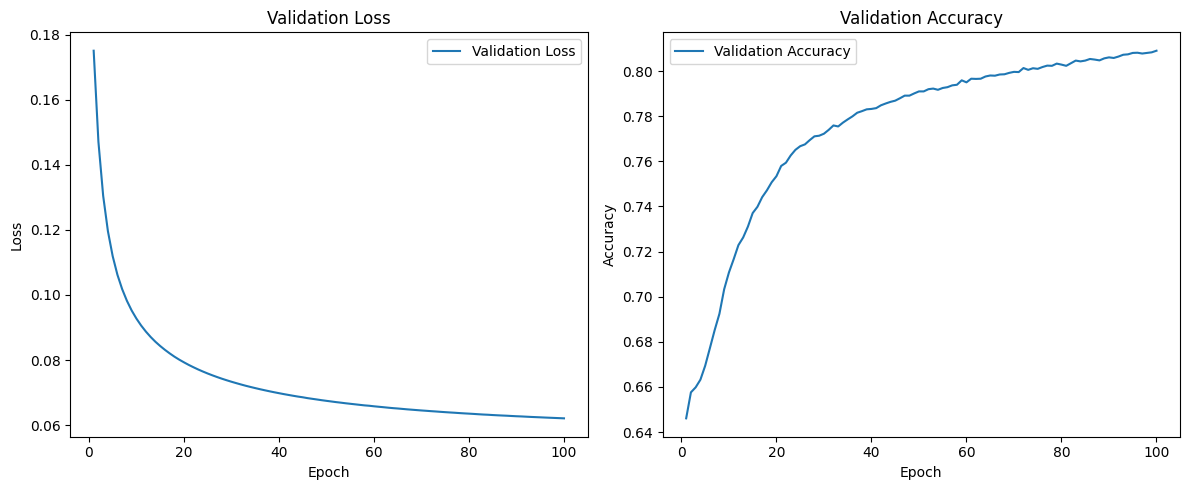

reg_strength:  0.1
Epoch 1/100 - Validation Loss: 0.1756 - Validation Accuracy: 0.6468
Epoch 2/100 - Validation Loss: 0.1485 - Validation Accuracy: 0.6557
Epoch 3/100 - Validation Loss: 0.1326 - Validation Accuracy: 0.6600
Epoch 4/100 - Validation Loss: 0.1224 - Validation Accuracy: 0.6637
Epoch 5/100 - Validation Loss: 0.1153 - Validation Accuracy: 0.6675
Epoch 6/100 - Validation Loss: 0.1100 - Validation Accuracy: 0.6737
Epoch 7/100 - Validation Loss: 0.1060 - Validation Accuracy: 0.6798
Epoch 8/100 - Validation Loss: 0.1029 - Validation Accuracy: 0.6867
Epoch 9/100 - Validation Loss: 0.1003 - Validation Accuracy: 0.6945
Epoch 10/100 - Validation Loss: 0.0982 - Validation Accuracy: 0.7013
Epoch 11/100 - Validation Loss: 0.0965 - Validation Accuracy: 0.7101
Epoch 12/100 - Validation Loss: 0.0949 - Validation Accuracy: 0.7127
Epoch 13/100 - Validation Loss: 0.0936 - Validation Accuracy: 0.7186
Epoch 14/100 - Validation Loss: 0.0925 - Validation Accuracy: 0.7230
Epoch 15/100 - Validatio

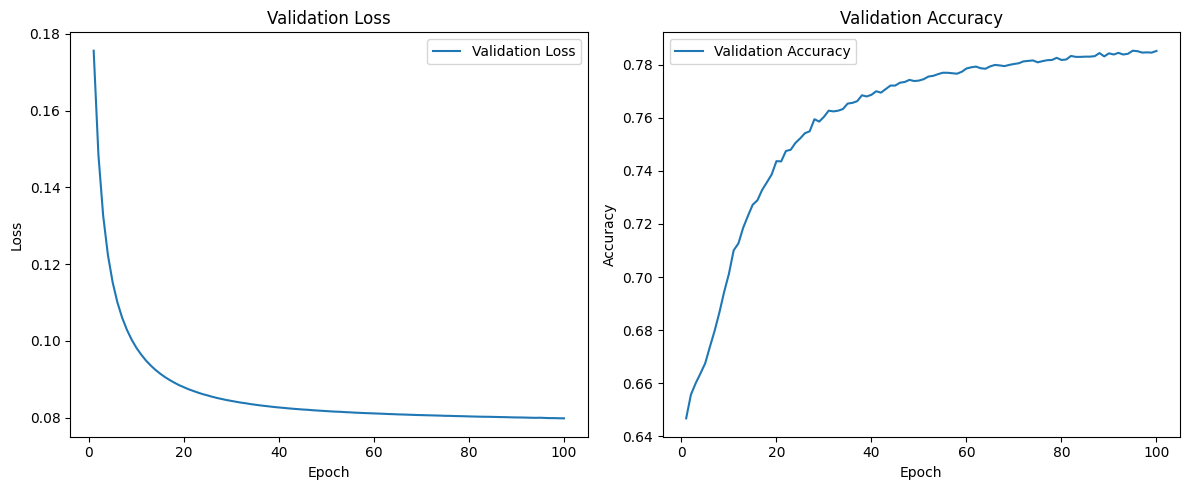

reg_strength:  0.5
Epoch 1/100 - Validation Loss: 0.1784 - Validation Accuracy: 0.6461
Epoch 2/100 - Validation Loss: 0.1552 - Validation Accuracy: 0.6541
Epoch 3/100 - Validation Loss: 0.1427 - Validation Accuracy: 0.6573
Epoch 4/100 - Validation Loss: 0.1354 - Validation Accuracy: 0.6593
Epoch 5/100 - Validation Loss: 0.1308 - Validation Accuracy: 0.6642
Epoch 6/100 - Validation Loss: 0.1277 - Validation Accuracy: 0.6642
Epoch 7/100 - Validation Loss: 0.1257 - Validation Accuracy: 0.6687
Epoch 8/100 - Validation Loss: 0.1242 - Validation Accuracy: 0.6682
Epoch 9/100 - Validation Loss: 0.1232 - Validation Accuracy: 0.6729
Epoch 10/100 - Validation Loss: 0.1225 - Validation Accuracy: 0.6748
Epoch 11/100 - Validation Loss: 0.1219 - Validation Accuracy: 0.6784
Epoch 12/100 - Validation Loss: 0.1215 - Validation Accuracy: 0.6804
Epoch 13/100 - Validation Loss: 0.1212 - Validation Accuracy: 0.6835
Epoch 14/100 - Validation Loss: 0.1209 - Validation Accuracy: 0.6836
Epoch 15/100 - Validatio

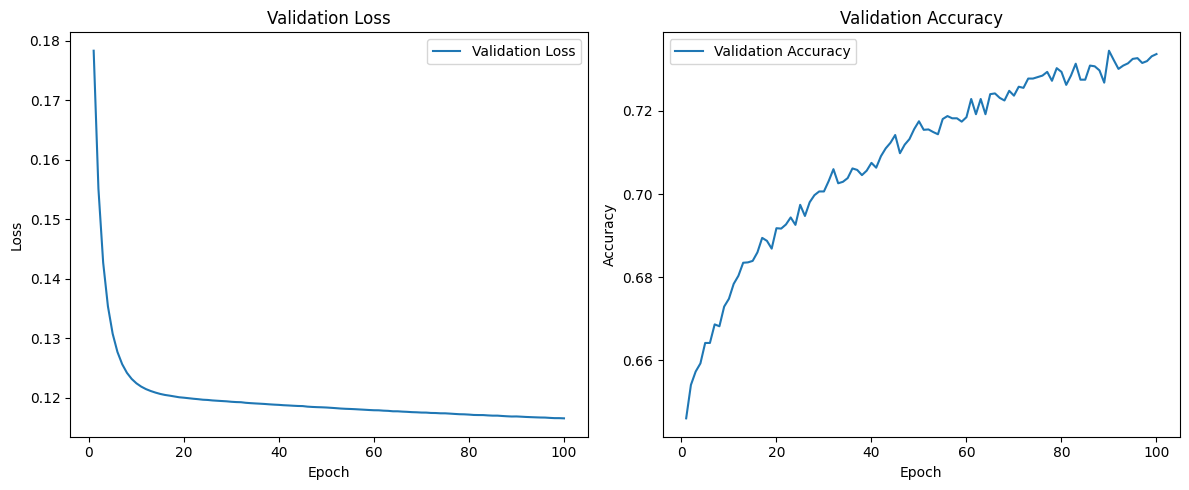

optimal reg_strength is:  0.02


In [47]:
# reg_strength choose parameters:
reg_max_value = reg_strength[0]
reg_max_accurecy = 0
for reg in reg_strength:
    print("reg_strength: ", reg)
    model = LogisticRegression(num_features, num_classes, learning_rate=lr_max_value, regularization='l2', reg_strength=reg)
    val_loss_history, val_acc_history = model.train(train_set_features.values, train_set_labels, epochs=100, batch_size=128, validation_data=(val_set_features.values, val_set_labels))
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    if val_acc_history[-1] > reg_max_accurecy:
        reg_max_accurecy = val_acc_history[-1]
        reg_max_value = reg
print ("optimal reg_strength is: ", reg_max_value)



Optimal paramter Regulariztion coefficitent in LR Model is reg_strength :  0.02

batch_size:  64
Epoch 1/100 - Validation Loss: 0.1471 - Validation Accuracy: 0.6566
Epoch 2/100 - Validation Loss: 0.1196 - Validation Accuracy: 0.6610
Epoch 3/100 - Validation Loss: 0.1062 - Validation Accuracy: 0.6764
Epoch 4/100 - Validation Loss: 0.0982 - Validation Accuracy: 0.6923
Epoch 5/100 - Validation Loss: 0.0927 - Validation Accuracy: 0.7112
Epoch 6/100 - Validation Loss: 0.0887 - Validation Accuracy: 0.7226
Epoch 7/100 - Validation Loss: 0.0856 - Validation Accuracy: 0.7314
Epoch 8/100 - Validation Loss: 0.0831 - Validation Accuracy: 0.7422
Epoch 9/100 - Validation Loss: 0.0811 - Validation Accuracy: 0.7471
Epoch 10/100 - Validation Loss: 0.0793 - Validation Accuracy: 0.7538
Epoch 11/100 - Validation Loss: 0.0778 - Validation Accuracy: 0.7612
Epoch 12/100 - Validation Loss: 0.0765 - Validation Accuracy: 0.7646
Epoch 13/100 - Validation Loss: 0.0753 - Validation Accuracy: 0.7673
Epoch 14/100 - Validation Loss: 0.0743 - Validation Accuracy: 0.7704
Epoch 15/100 - Validation L

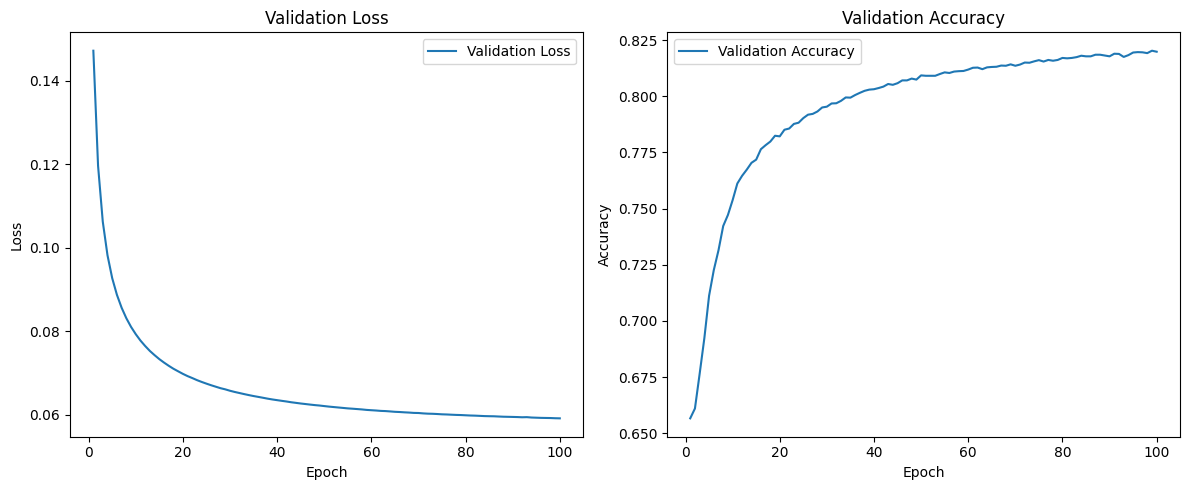

batch_size:  512
Epoch 1/100 - Validation Loss: 0.2112 - Validation Accuracy: 0.5757
Epoch 2/100 - Validation Loss: 0.1968 - Validation Accuracy: 0.6356
Epoch 3/100 - Validation Loss: 0.1849 - Validation Accuracy: 0.6462
Epoch 4/100 - Validation Loss: 0.1748 - Validation Accuracy: 0.6498
Epoch 5/100 - Validation Loss: 0.1662 - Validation Accuracy: 0.6525
Epoch 6/100 - Validation Loss: 0.1588 - Validation Accuracy: 0.6544
Epoch 7/100 - Validation Loss: 0.1524 - Validation Accuracy: 0.6567
Epoch 8/100 - Validation Loss: 0.1468 - Validation Accuracy: 0.6571
Epoch 9/100 - Validation Loss: 0.1419 - Validation Accuracy: 0.6561
Epoch 10/100 - Validation Loss: 0.1376 - Validation Accuracy: 0.6574
Epoch 11/100 - Validation Loss: 0.1337 - Validation Accuracy: 0.6576
Epoch 12/100 - Validation Loss: 0.1302 - Validation Accuracy: 0.6593
Epoch 13/100 - Validation Loss: 0.1271 - Validation Accuracy: 0.6596
Epoch 14/100 - Validation Loss: 0.1243 - Validation Accuracy: 0.6604
Epoch 15/100 - Validation 

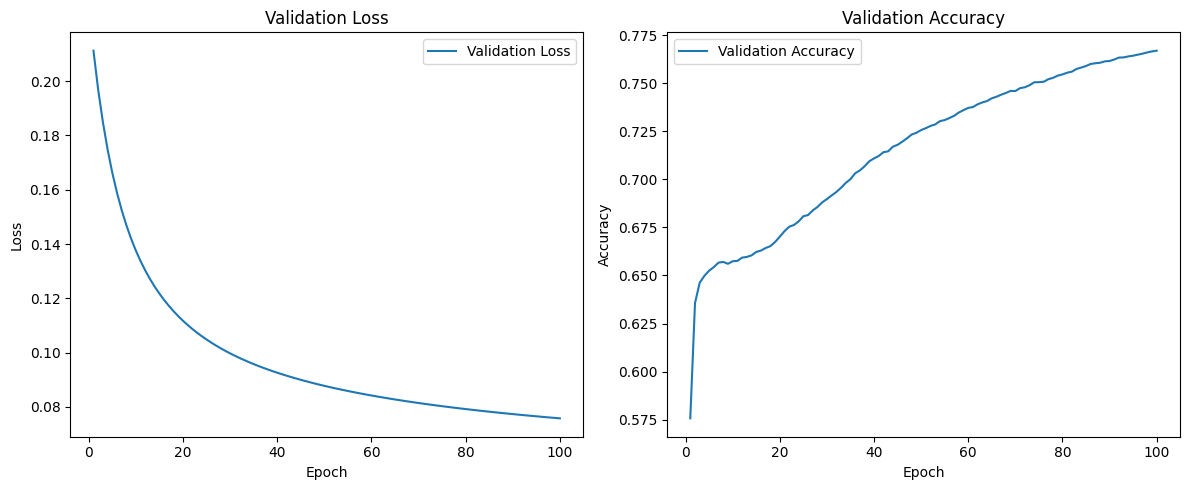

batch_size:  2048
Epoch 1/100 - Validation Loss: 0.2247 - Validation Accuracy: 0.4214
Epoch 2/100 - Validation Loss: 0.2198 - Validation Accuracy: 0.4852
Epoch 3/100 - Validation Loss: 0.2153 - Validation Accuracy: 0.5321
Epoch 4/100 - Validation Loss: 0.2112 - Validation Accuracy: 0.5710
Epoch 5/100 - Validation Loss: 0.2073 - Validation Accuracy: 0.5972
Epoch 6/100 - Validation Loss: 0.2036 - Validation Accuracy: 0.6131
Epoch 7/100 - Validation Loss: 0.2001 - Validation Accuracy: 0.6259
Epoch 8/100 - Validation Loss: 0.1968 - Validation Accuracy: 0.6321
Epoch 9/100 - Validation Loss: 0.1936 - Validation Accuracy: 0.6383
Epoch 10/100 - Validation Loss: 0.1906 - Validation Accuracy: 0.6422
Epoch 11/100 - Validation Loss: 0.1877 - Validation Accuracy: 0.6435
Epoch 12/100 - Validation Loss: 0.1849 - Validation Accuracy: 0.6461
Epoch 13/100 - Validation Loss: 0.1822 - Validation Accuracy: 0.6473
Epoch 14/100 - Validation Loss: 0.1797 - Validation Accuracy: 0.6484
Epoch 15/100 - Validation

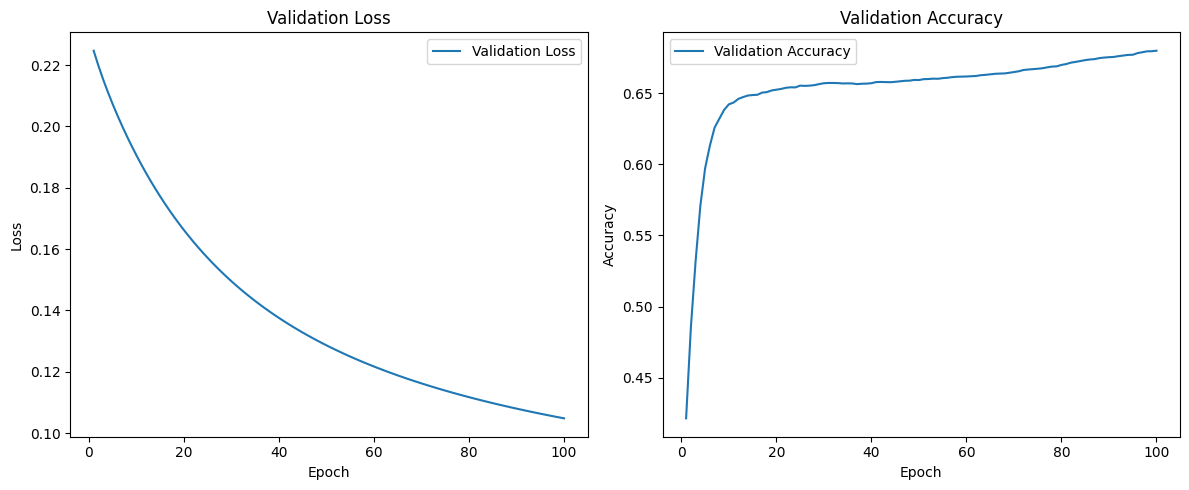

optimal batch_size is:  64


In [50]:
# batch_size choose parameters:
batch_max_value = batch_size[0]
batch_max_accuracy = 0
for batch in batch_size:
    print("batch_size: ", batch)
    model = LogisticRegression(num_features, num_classes, learning_rate=lr_max_value, regularization='l2', reg_strength=reg_max_value)
    val_loss_history, val_acc_history = model.train(train_set_features.values, train_set_labels, epochs=100, batch_size=batch, validation_data=(val_set_features.values, val_set_labels))
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    if val_acc_history[-1] > batch_max_value:
        batch_max_accuracy = val_acc_history[-1]
        batch_max_value = batch
print ("optimal batch_size is: ", batch_max_value)



Optimal paramter Batch size in LR Model is batch size : 64

In [ ]:
# Part 2 - Section C -  will use the combination of the best hyperparamters and show the result.

optimal lerning rate is:  0.001 optimal reg_strength is:  0.02 optimal batch_size is:  64
Epoch 1/150 - Validation Loss: 0.1471 - Validation Accuracy: 0.6568
Epoch 2/150 - Validation Loss: 0.1196 - Validation Accuracy: 0.6611
Epoch 3/150 - Validation Loss: 0.1062 - Validation Accuracy: 0.6782
Epoch 4/150 - Validation Loss: 0.0982 - Validation Accuracy: 0.6933
Epoch 5/150 - Validation Loss: 0.0927 - Validation Accuracy: 0.7099
Epoch 6/150 - Validation Loss: 0.0887 - Validation Accuracy: 0.7239
Epoch 7/150 - Validation Loss: 0.0857 - Validation Accuracy: 0.7331
Epoch 8/150 - Validation Loss: 0.0831 - Validation Accuracy: 0.7405
Epoch 9/150 - Validation Loss: 0.0811 - Validation Accuracy: 0.7478
Epoch 10/150 - Validation Loss: 0.0793 - Validation Accuracy: 0.7542
Epoch 11/150 - Validation Loss: 0.0778 - Validation Accuracy: 0.7608
Epoch 12/150 - Validation Loss: 0.0765 - Validation Accuracy: 0.7654
Epoch 13/150 - Validation Loss: 0.0753 - Validation Accuracy: 0.7674
Epoch 14/150 - Validat

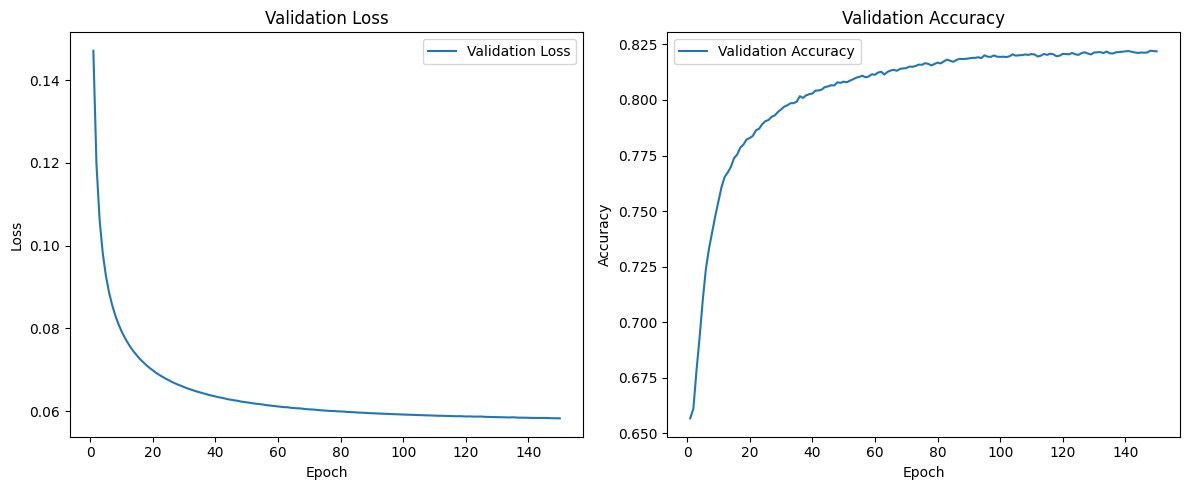

In [55]:
# optimal parameters:
print ("optimal lerning rate is: ", lr_max_value, "optimal reg_strength is: ", reg_max_value, "optimal batch_size is: ", batch_max_value)
model = LogisticRegression(num_features, num_classes, learning_rate=lr_max_value, regularization='l2', reg_strength=reg_max_value)
val_loss_history, val_acc_history = model.train(train_set_features.values, train_set_labels, epochs=150, batch_size=batch_max_value, validation_data=(val_set_features.values, val_set_labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on test set
predictions = model.predict(test_data_features.values)

# Save predictions to a file
np.savetxt('lr_pred.csv', predictions, fmt='%d')

Optimal Solution in LR model by grid paramter learnings

Part 3 - NN Model

In [40]:
# part 3 : Section A contatins a definition of the NN model with no paramters tuning.
        

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Define neural network model
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, reg_strength=0.001, p=0, activation_function=relu):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.reg_strength = reg_strength
        self.p = p
        self.activation_function = activation_function
        
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)
    
    def forward(self, X, activation_function):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.h = activation_function(self.z1)
        self.dropout(X, self.p)
        self.z2 = np.dot(self.h, self.W2) + self.b2
        exp_scores = np.exp(self.z2 - np.max(self.z2, axis=1, keepdims=True))
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return self.probs
    
    def dropout(self, x_batch, p):
        drop = np.random.binomial([np.ones((x_batch.shape[0],self.W1.shape[1]))],1-self.p)[0] * (1.0/(1-self.p))
        self.h *= drop
        
    def backward(self, X, y):
        num_examples = X.shape[0]
        delta3 = self.probs - y
        dW2 = np.dot(self.h.T, delta3) / num_examples
        db2 = np.sum(delta3, axis=0) / num_examples
        delta2 = np.dot(delta3, self.W2.T) * (self.h > 0)  # ReLU derivative
        dW1 = np.dot(X.T, delta2) / num_examples
        db1 = np.sum(delta2, axis=0) / num_examples
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def accuracy_score(self, y_true, y_pred):
        # Convert y_true and y_pred to numpy arrays if they are not already
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        
        # Compute the number of correct predictions
        correct_predictions = np.sum(y_true == y_pred)
        
        # Compute the total number of predictions
        total_predictions = len(y_true)
        
        # Compute the accuracy
        accuracy = correct_predictions / total_predictions
        
        return accuracy

    def compute_loss(self, X, y):
        num_examples = X.shape[0]
        # Forward pass
        z1 = np.dot(X, self.W1) + self.b1
        h = np.maximum(0, z1)  # ReLU activation
        z2 = np.dot(h, self.W2) + self.b2
        exp_scores = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Cross-entropy loss
        corect_logprobs = -np.log(probs[range(num_examples), np.argmax(y, axis=1)])
        data_loss = np.sum(corect_logprobs) / num_examples
        # Add regularization term (optional)
        reg_loss = self.reg_strength * (np.linalg.norm(self.W1)**2 + np.linalg.norm(self.W2)**2)
        # Total loss
        loss = (data_loss + reg_loss)
        return loss
    
    
    def train(self, X, y, X_val, y_val, epochs, batch_size):
        val_loss_history = []
        val_acc_history = []
        for epoch in range(epochs):
            # Mini-batch gradient descent
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                # Forward pass
                self.forward(X_batch, self.activation_function)
                # Backward pass
                dW1, db1, dW2, db2 = self.backward(X_batch, y_batch)
                # Update parameters
                self.update_parameters(dW1, db1, dW2, db2)
            # Compute accuracy on validation set
            val_probs = self.forward(X_val, self.activation_function)
            val_preds = np.argmax(val_probs, axis=1)
            val_true = np.argmax(y_val, axis=1)
            val_acc = self.accuracy_score(val_preds,val_true)
            val_acc_history.append(val_acc)
            # Compute validation loss
            val_loss = self.compute_loss(X_val, y_val) / batch_size
            val_loss_history.append(val_loss)
            print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f},  Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_acc:.4f}")

        return val_loss_history, val_acc_history

    def predict(self, X):
        y_pred = self.forward(X, self.activation_function)
        return np.argmax(y_pred, axis=1)
    

In [27]:
import os
import matplotlib.pyplot as plt
TRAIN_IMAGE_PATH = os.path.join(os.getcwd(),'MNISTFashion_Data\\train.csv')
TEST_IMAGE_PATH = os.path.join(os.getcwd(),'MNISTFashion_Data\\test.csv')

# Load Fashion-MNIST dataset
fashion_mnist_train = pd.read_csv(TRAIN_IMAGE_PATH)
fashion_mnist_test = pd.read_csv(TEST_IMAGE_PATH)

# Preprocessing
X = fashion_mnist_train.iloc[:, 1:].values / 255.0
y = pd.get_dummies(fashion_mnist_train['label']).values
X_test = fashion_mnist_test.iloc[:, 0:].values / 255.0

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the neural network
input_size = X_train.shape[1]
learning_rate = [0.05, 0.01, 0.001]
reg_strength = [0.02, 0.1, 0.5]
p = [0.0, 0.1, 0.2, 0.5]
hidden_size = [20,50,100]
activation_functions = [relu, sigmoid, tanh]
output_size = 10
epochs = 20
batch_sizes = [64, 512, 2048]




Epoch 1/100, Validation Loss: 12.1240,  Epoch 1/100, Validation Accuracy: 0.6138
Epoch 2/100, Validation Loss: 12.1044,  Epoch 2/100, Validation Accuracy: 0.6575
Epoch 3/100, Validation Loss: 12.0909,  Epoch 3/100, Validation Accuracy: 0.6806
Epoch 4/100, Validation Loss: 12.0805,  Epoch 4/100, Validation Accuracy: 0.7017
Epoch 5/100, Validation Loss: 12.0721,  Epoch 5/100, Validation Accuracy: 0.7137
Epoch 6/100, Validation Loss: 12.0649,  Epoch 6/100, Validation Accuracy: 0.7212
Epoch 7/100, Validation Loss: 12.0585,  Epoch 7/100, Validation Accuracy: 0.7269
Epoch 8/100, Validation Loss: 12.0526,  Epoch 8/100, Validation Accuracy: 0.7316
Epoch 9/100, Validation Loss: 12.0471,  Epoch 9/100, Validation Accuracy: 0.7411
Epoch 10/100, Validation Loss: 12.0418,  Epoch 10/100, Validation Accuracy: 0.7461
Epoch 11/100, Validation Loss: 12.0369,  Epoch 11/100, Validation Accuracy: 0.7505
Epoch 12/100, Validation Loss: 12.0320,  Epoch 12/100, Validation Accuracy: 0.7550
Epoch 13/100, Validati

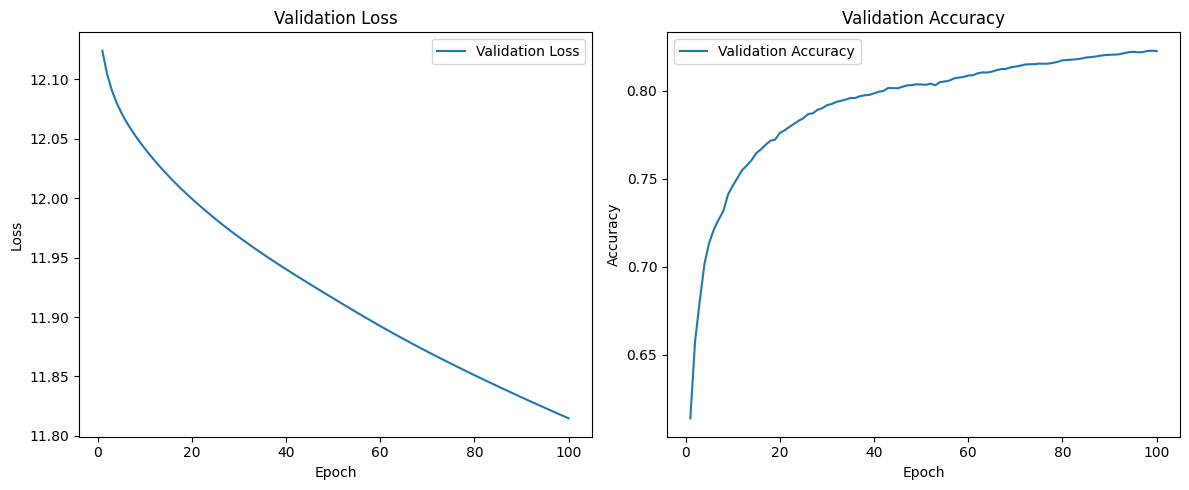

In [28]:
# Plot loss and accuracy curves
import matplotlib.pyplot as plt

# Initialize and train the model
num_features = train_set_features.shape[1]
num_classes = train_set_labels.shape[1]
model = NeuralNetwork(input_size, 20, output_size, learning_rate=0.05, reg_strength=0.05, p=0, activation_function=relu)
val_loss_history, val_acc_history = model.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=batch_sizes[0])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on test set
predictions = model.predict(test_data_features.values)

# Save predictions to a file
np.savetxt('NN_pred.csv', predictions, fmt='%d')

In [ ]:
# Part 3 - Section B  - paramter tuning of the NN model and each one will show the best hyperparamter.
# Parameters tuning - NN:

learning rate:  0.05
Epoch 1/100, Validation Loss: 12.4282,  Epoch 1/100, Validation Accuracy: 0.5616
Epoch 2/100, Validation Loss: 12.4139,  Epoch 2/100, Validation Accuracy: 0.6233
Epoch 3/100, Validation Loss: 12.4053,  Epoch 3/100, Validation Accuracy: 0.6497
Epoch 4/100, Validation Loss: 12.3983,  Epoch 4/100, Validation Accuracy: 0.6665
Epoch 5/100, Validation Loss: 12.3916,  Epoch 5/100, Validation Accuracy: 0.6760
Epoch 6/100, Validation Loss: 12.3853,  Epoch 6/100, Validation Accuracy: 0.6832
Epoch 7/100, Validation Loss: 12.3791,  Epoch 7/100, Validation Accuracy: 0.6886
Epoch 8/100, Validation Loss: 12.3733,  Epoch 8/100, Validation Accuracy: 0.6900
Epoch 9/100, Validation Loss: 12.3677,  Epoch 9/100, Validation Accuracy: 0.6945
Epoch 10/100, Validation Loss: 12.3623,  Epoch 10/100, Validation Accuracy: 0.6956
Epoch 11/100, Validation Loss: 12.3572,  Epoch 11/100, Validation Accuracy: 0.6977
Epoch 12/100, Validation Loss: 12.3522,  Epoch 12/100, Validation Accuracy: 0.7036
E

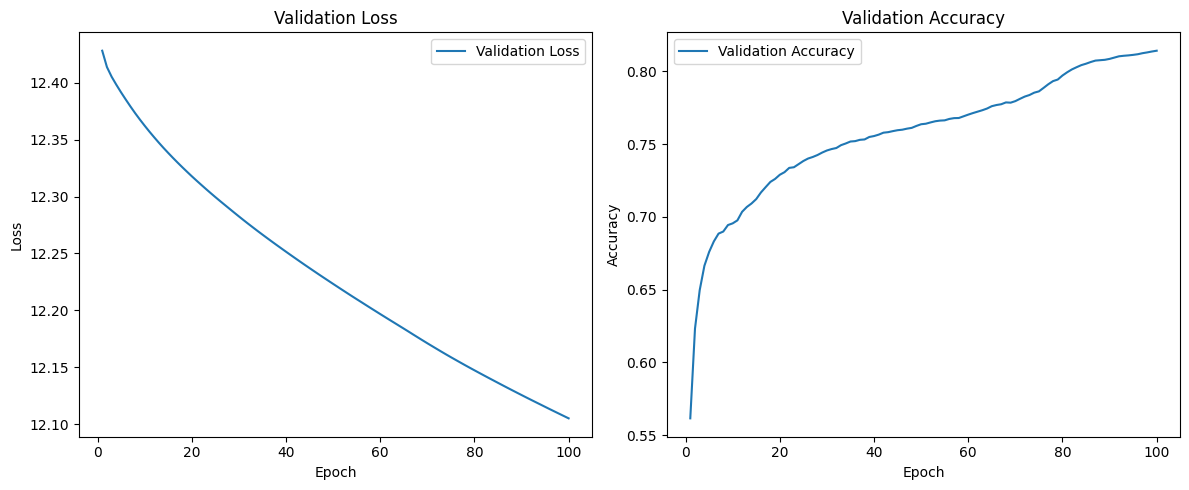

learning rate:  0.01
Epoch 1/100, Validation Loss: 12.6043,  Epoch 1/100, Validation Accuracy: 0.4121
Epoch 2/100, Validation Loss: 12.5884,  Epoch 2/100, Validation Accuracy: 0.4929
Epoch 3/100, Validation Loss: 12.5801,  Epoch 3/100, Validation Accuracy: 0.5360
Epoch 4/100, Validation Loss: 12.5746,  Epoch 4/100, Validation Accuracy: 0.5669
Epoch 5/100, Validation Loss: 12.5702,  Epoch 5/100, Validation Accuracy: 0.5867
Epoch 6/100, Validation Loss: 12.5666,  Epoch 6/100, Validation Accuracy: 0.6021
Epoch 7/100, Validation Loss: 12.5635,  Epoch 7/100, Validation Accuracy: 0.6141
Epoch 8/100, Validation Loss: 12.5607,  Epoch 8/100, Validation Accuracy: 0.6259
Epoch 9/100, Validation Loss: 12.5581,  Epoch 9/100, Validation Accuracy: 0.6346
Epoch 10/100, Validation Loss: 12.5557,  Epoch 10/100, Validation Accuracy: 0.6412
Epoch 11/100, Validation Loss: 12.5535,  Epoch 11/100, Validation Accuracy: 0.6472
Epoch 12/100, Validation Loss: 12.5514,  Epoch 12/100, Validation Accuracy: 0.6521
E

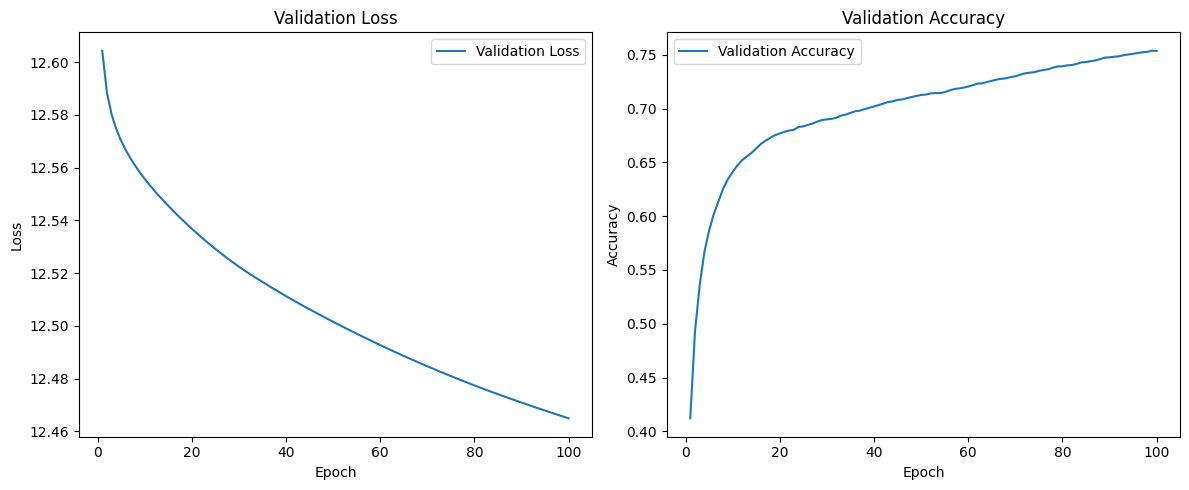

learning rate:  0.001
Epoch 1/100, Validation Loss: 12.5167,  Epoch 1/100, Validation Accuracy: 0.2568
Epoch 2/100, Validation Loss: 12.4460,  Epoch 2/100, Validation Accuracy: 0.3189
Epoch 3/100, Validation Loss: 12.4161,  Epoch 3/100, Validation Accuracy: 0.3572
Epoch 4/100, Validation Loss: 12.3999,  Epoch 4/100, Validation Accuracy: 0.4088
Epoch 5/100, Validation Loss: 12.3895,  Epoch 5/100, Validation Accuracy: 0.4336
Epoch 6/100, Validation Loss: 12.3822,  Epoch 6/100, Validation Accuracy: 0.4520
Epoch 7/100, Validation Loss: 12.3767,  Epoch 7/100, Validation Accuracy: 0.4686
Epoch 8/100, Validation Loss: 12.3723,  Epoch 8/100, Validation Accuracy: 0.4829
Epoch 9/100, Validation Loss: 12.3687,  Epoch 9/100, Validation Accuracy: 0.4931
Epoch 10/100, Validation Loss: 12.3657,  Epoch 10/100, Validation Accuracy: 0.5012
Epoch 11/100, Validation Loss: 12.3632,  Epoch 11/100, Validation Accuracy: 0.5091
Epoch 12/100, Validation Loss: 12.3610,  Epoch 12/100, Validation Accuracy: 0.5144


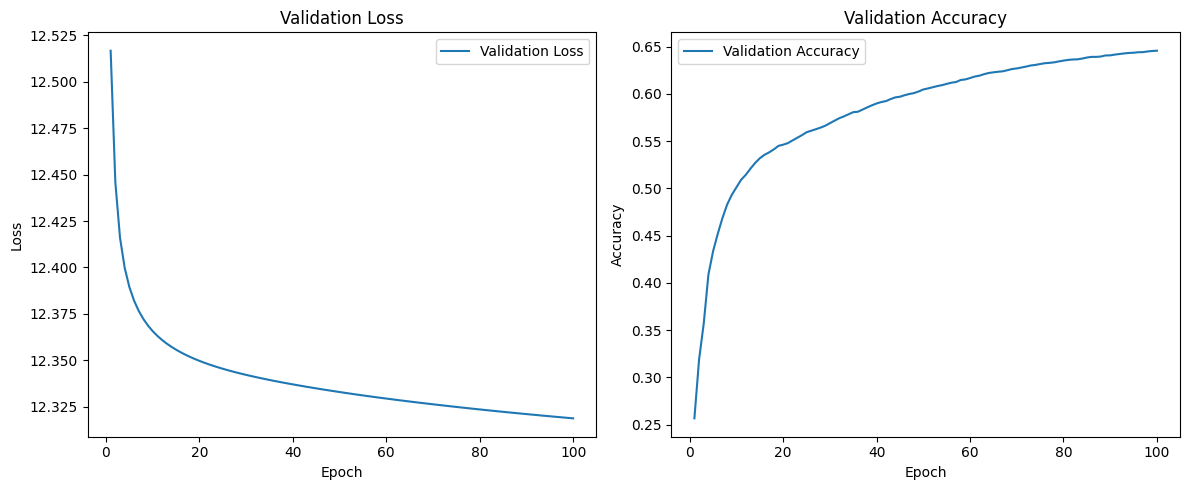

optimal lerning rate is:  0.05


In [30]:

# lerning rate choose parameters
lr_max_value = learning_rate[0]
lr_max_accuracy = 0
for lr in learning_rate:
    print("learning rate: ", lr)
    model = NeuralNetwork(input_size, hidden_size[0], output_size, learning_rate=lr, reg_strength=0.05, p=0, activation_function=relu)
    val_loss_history, val_acc_history = model.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=batch_sizes[0])
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    if val_acc_history[-1] > lr_max_accuracy:
        lr_max_accuracy = val_acc_history[-1]
        lr_max_value = lr
print ("optimal lerning rate is: ", lr_max_value)



Optimal paramter Learning Rate in NN Model is lerning rate :  0.05

reg_strength:  0.02
Epoch 1/100, Validation Loss: 4.8792,  Epoch 1/100, Validation Accuracy: 0.5822
Epoch 2/100, Validation Loss: 4.8729,  Epoch 2/100, Validation Accuracy: 0.6255
Epoch 3/100, Validation Loss: 4.8687,  Epoch 3/100, Validation Accuracy: 0.6497
Epoch 4/100, Validation Loss: 4.8654,  Epoch 4/100, Validation Accuracy: 0.6631
Epoch 5/100, Validation Loss: 4.8624,  Epoch 5/100, Validation Accuracy: 0.6726
Epoch 6/100, Validation Loss: 4.8597,  Epoch 6/100, Validation Accuracy: 0.6799
Epoch 7/100, Validation Loss: 4.8572,  Epoch 7/100, Validation Accuracy: 0.6874
Epoch 8/100, Validation Loss: 4.8549,  Epoch 8/100, Validation Accuracy: 0.6933
Epoch 9/100, Validation Loss: 4.8526,  Epoch 9/100, Validation Accuracy: 0.6979
Epoch 10/100, Validation Loss: 4.8505,  Epoch 10/100, Validation Accuracy: 0.7029
Epoch 11/100, Validation Loss: 4.8485,  Epoch 11/100, Validation Accuracy: 0.7071
Epoch 12/100, Validation Loss: 4.8466,  Epoch 12/100, Validation Accuracy: 0.7102
Epoch 13/100, 

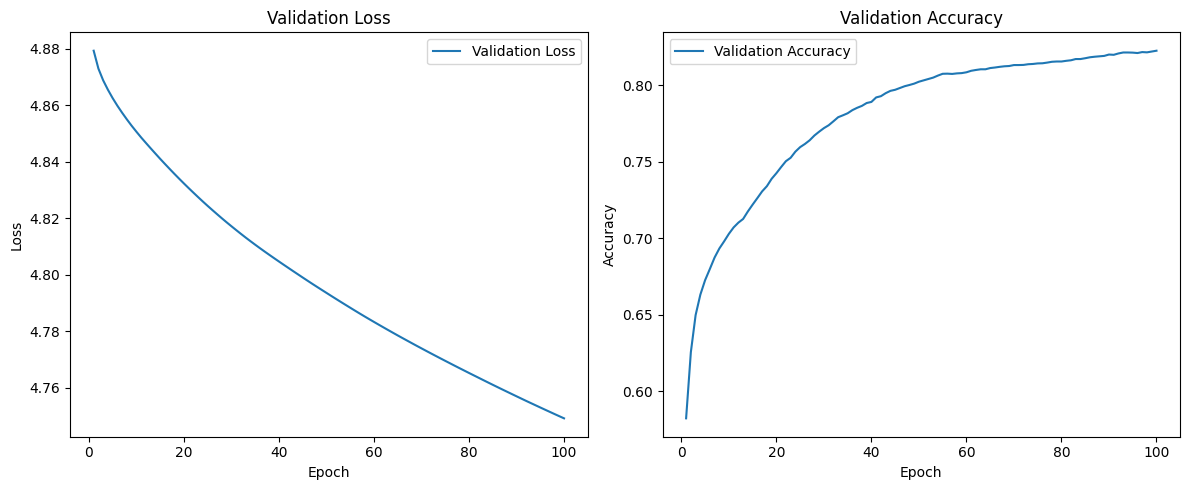

reg_strength:  0.1
Epoch 1/100, Validation Loss: 24.5614,  Epoch 1/100, Validation Accuracy: 0.6287
Epoch 2/100, Validation Loss: 24.5357,  Epoch 2/100, Validation Accuracy: 0.6696
Epoch 3/100, Validation Loss: 24.5183,  Epoch 3/100, Validation Accuracy: 0.6877
Epoch 4/100, Validation Loss: 24.5039,  Epoch 4/100, Validation Accuracy: 0.7039
Epoch 5/100, Validation Loss: 24.4912,  Epoch 5/100, Validation Accuracy: 0.7157
Epoch 6/100, Validation Loss: 24.4797,  Epoch 6/100, Validation Accuracy: 0.7234
Epoch 7/100, Validation Loss: 24.4689,  Epoch 7/100, Validation Accuracy: 0.7297
Epoch 8/100, Validation Loss: 24.4587,  Epoch 8/100, Validation Accuracy: 0.7367
Epoch 9/100, Validation Loss: 24.4490,  Epoch 9/100, Validation Accuracy: 0.7452
Epoch 10/100, Validation Loss: 24.4395,  Epoch 10/100, Validation Accuracy: 0.7512
Epoch 11/100, Validation Loss: 24.4303,  Epoch 11/100, Validation Accuracy: 0.7560
Epoch 12/100, Validation Loss: 24.4215,  Epoch 12/100, Validation Accuracy: 0.7604
Epo

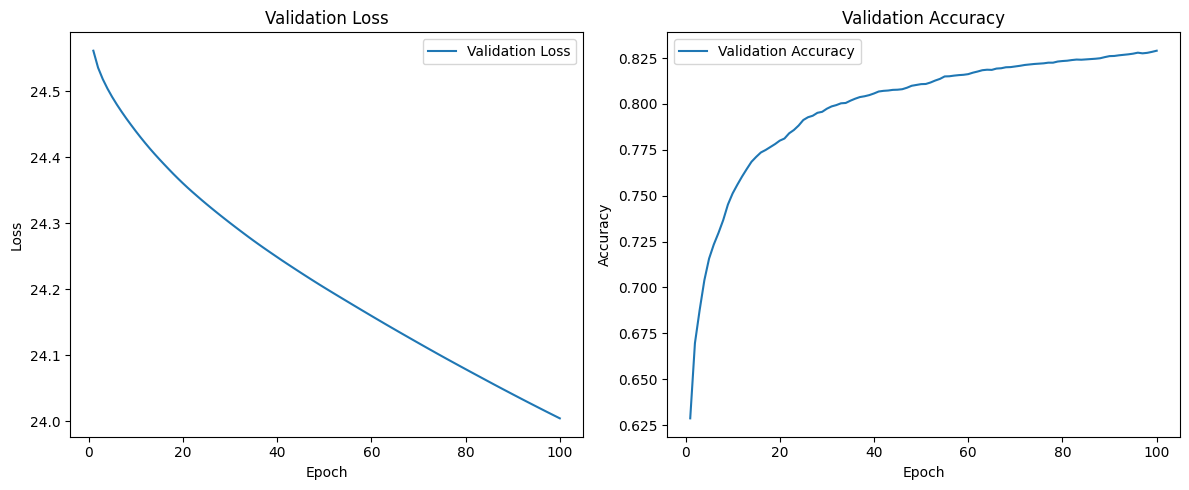

reg_strength:  0.5
Epoch 1/100, Validation Loss: 124.7327,  Epoch 1/100, Validation Accuracy: 0.6288
Epoch 2/100, Validation Loss: 124.5700,  Epoch 2/100, Validation Accuracy: 0.6641
Epoch 3/100, Validation Loss: 124.4633,  Epoch 3/100, Validation Accuracy: 0.6787
Epoch 4/100, Validation Loss: 124.3793,  Epoch 4/100, Validation Accuracy: 0.6899
Epoch 5/100, Validation Loss: 124.3087,  Epoch 5/100, Validation Accuracy: 0.7018
Epoch 6/100, Validation Loss: 124.2477,  Epoch 6/100, Validation Accuracy: 0.7135
Epoch 7/100, Validation Loss: 124.1928,  Epoch 7/100, Validation Accuracy: 0.7236
Epoch 8/100, Validation Loss: 124.1413,  Epoch 8/100, Validation Accuracy: 0.7286
Epoch 9/100, Validation Loss: 124.0919,  Epoch 9/100, Validation Accuracy: 0.7330
Epoch 10/100, Validation Loss: 124.0444,  Epoch 10/100, Validation Accuracy: 0.7360
Epoch 11/100, Validation Loss: 123.9983,  Epoch 11/100, Validation Accuracy: 0.7437
Epoch 12/100, Validation Loss: 123.9536,  Epoch 12/100, Validation Accuracy

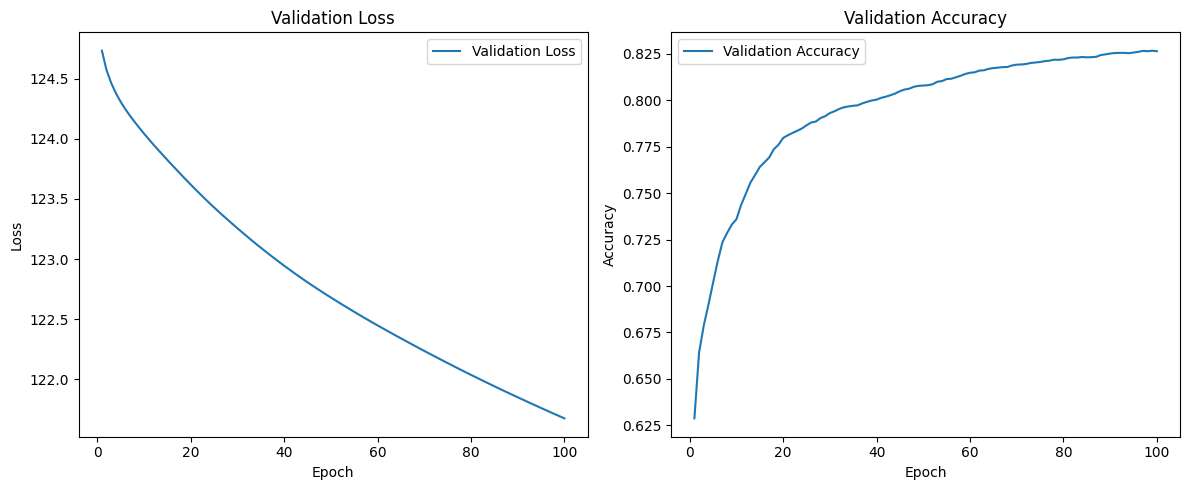

optimal reg_strength is:  0.1


In [32]:
# reg_strength choose parameters:
reg_max_value = reg_strength[0]
reg_max_accuracy = 0
for reg in reg_strength:
    print("reg_strength: ", reg)
    model = NeuralNetwork(input_size, hidden_size[0], output_size, learning_rate=lr_max_value, reg_strength=reg, p=0)
    val_loss_history, val_acc_history = model.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=batch_sizes[0])
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    if val_acc_history[-1] > reg_max_accuracy:
        reg_max_accuracy = val_acc_history[-1]
        reg_max_value = reg
print ("optimal reg_strength is: ", reg_max_value)



Optimal paramter Regulariztion coefficitent in NN Model is reg_strength :  0.1

p:  0.0
Epoch 1/100, Validation Loss: 24.6241,  Epoch 1/100, Validation Accuracy: 0.5506
Epoch 2/100, Validation Loss: 24.5914,  Epoch 2/100, Validation Accuracy: 0.6154
Epoch 3/100, Validation Loss: 24.5671,  Epoch 3/100, Validation Accuracy: 0.6387
Epoch 4/100, Validation Loss: 24.5465,  Epoch 4/100, Validation Accuracy: 0.6514
Epoch 5/100, Validation Loss: 24.5278,  Epoch 5/100, Validation Accuracy: 0.6600
Epoch 6/100, Validation Loss: 24.5107,  Epoch 6/100, Validation Accuracy: 0.6667
Epoch 7/100, Validation Loss: 24.4948,  Epoch 7/100, Validation Accuracy: 0.6724
Epoch 8/100, Validation Loss: 24.4796,  Epoch 8/100, Validation Accuracy: 0.6797
Epoch 9/100, Validation Loss: 24.4649,  Epoch 9/100, Validation Accuracy: 0.6879
Epoch 10/100, Validation Loss: 24.4508,  Epoch 10/100, Validation Accuracy: 0.6954
Epoch 11/100, Validation Loss: 24.4373,  Epoch 11/100, Validation Accuracy: 0.7021
Epoch 12/100, Validation Loss: 24.4244,  Epoch 12/100, Validation Accuracy: 0.7055
Epoch 13/100, 

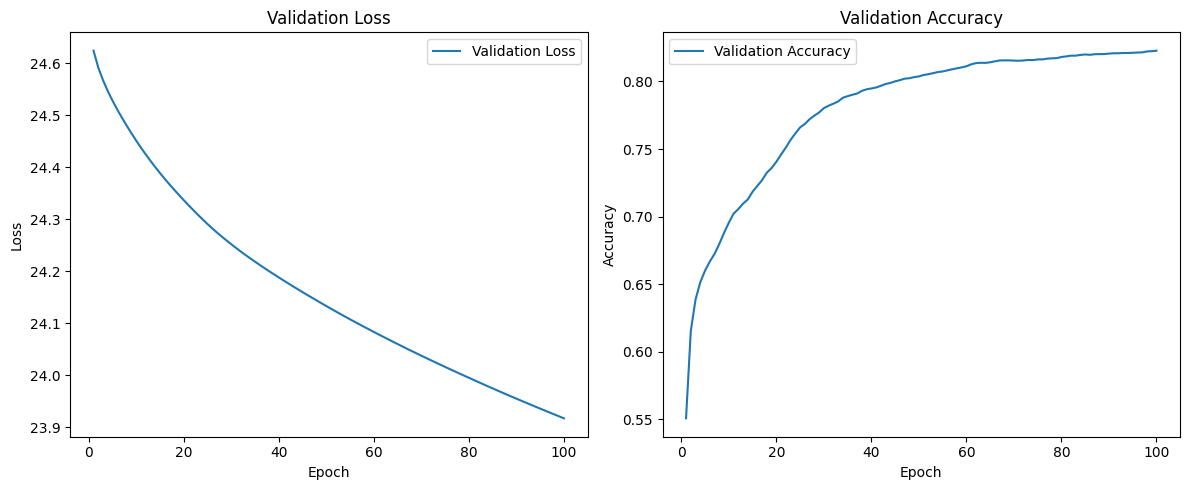

p:  0.1
Epoch 1/100, Validation Loss: 24.3518,  Epoch 1/100, Validation Accuracy: 0.5536
Epoch 2/100, Validation Loss: 24.3309,  Epoch 2/100, Validation Accuracy: 0.5957
Epoch 3/100, Validation Loss: 24.3149,  Epoch 3/100, Validation Accuracy: 0.6171
Epoch 4/100, Validation Loss: 24.3013,  Epoch 4/100, Validation Accuracy: 0.6221
Epoch 5/100, Validation Loss: 24.2882,  Epoch 5/100, Validation Accuracy: 0.6324
Epoch 6/100, Validation Loss: 24.2765,  Epoch 6/100, Validation Accuracy: 0.6505
Epoch 7/100, Validation Loss: 24.2650,  Epoch 7/100, Validation Accuracy: 0.6553
Epoch 8/100, Validation Loss: 24.2540,  Epoch 8/100, Validation Accuracy: 0.6561
Epoch 9/100, Validation Loss: 24.2437,  Epoch 9/100, Validation Accuracy: 0.6633
Epoch 10/100, Validation Loss: 24.2330,  Epoch 10/100, Validation Accuracy: 0.6699
Epoch 11/100, Validation Loss: 24.2226,  Epoch 11/100, Validation Accuracy: 0.6819
Epoch 12/100, Validation Loss: 24.2126,  Epoch 12/100, Validation Accuracy: 0.6886
Epoch 13/100, 

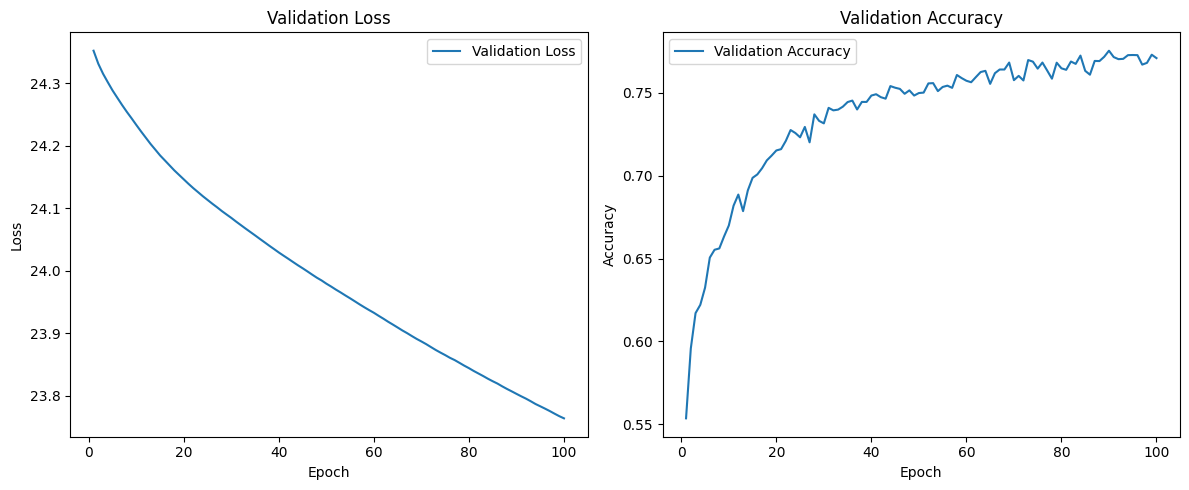

p:  0.2
Epoch 1/100, Validation Loss: 24.8293,  Epoch 1/100, Validation Accuracy: 0.4192
Epoch 2/100, Validation Loss: 24.8050,  Epoch 2/100, Validation Accuracy: 0.4509
Epoch 3/100, Validation Loss: 24.7878,  Epoch 3/100, Validation Accuracy: 0.4674
Epoch 4/100, Validation Loss: 24.7736,  Epoch 4/100, Validation Accuracy: 0.4782
Epoch 5/100, Validation Loss: 24.7620,  Epoch 5/100, Validation Accuracy: 0.5227
Epoch 6/100, Validation Loss: 24.7500,  Epoch 6/100, Validation Accuracy: 0.5260
Epoch 7/100, Validation Loss: 24.7376,  Epoch 7/100, Validation Accuracy: 0.5288
Epoch 8/100, Validation Loss: 24.7261,  Epoch 8/100, Validation Accuracy: 0.5489
Epoch 9/100, Validation Loss: 24.7152,  Epoch 9/100, Validation Accuracy: 0.5579
Epoch 10/100, Validation Loss: 24.7051,  Epoch 10/100, Validation Accuracy: 0.5735
Epoch 11/100, Validation Loss: 24.6961,  Epoch 11/100, Validation Accuracy: 0.5787
Epoch 12/100, Validation Loss: 24.6879,  Epoch 12/100, Validation Accuracy: 0.5897
Epoch 13/100, 

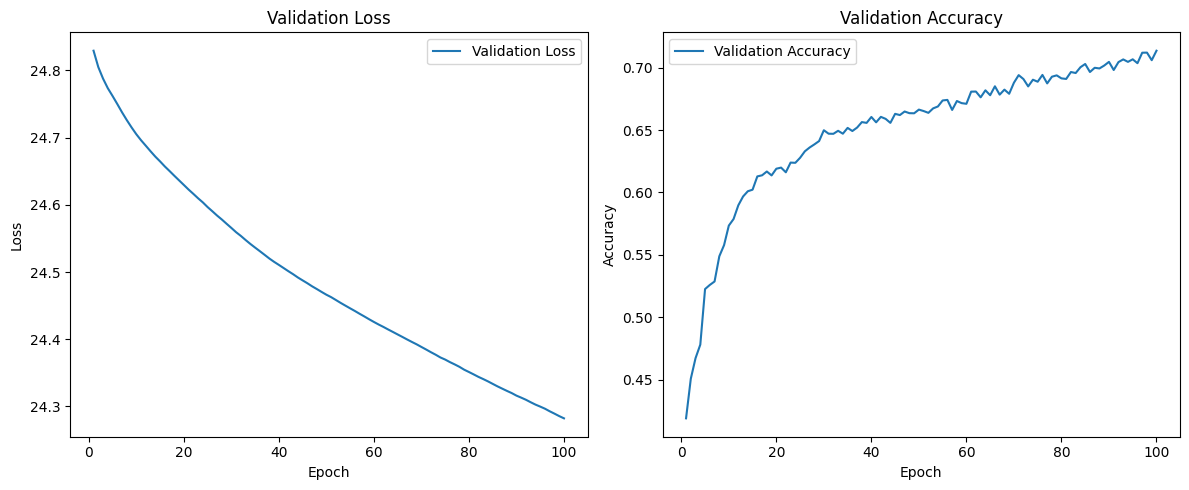

p:  0.5
Epoch 1/100, Validation Loss: 24.8539,  Epoch 1/100, Validation Accuracy: 0.3005
Epoch 2/100, Validation Loss: 24.8320,  Epoch 2/100, Validation Accuracy: 0.3391
Epoch 3/100, Validation Loss: 24.8156,  Epoch 3/100, Validation Accuracy: 0.3578
Epoch 4/100, Validation Loss: 24.8017,  Epoch 4/100, Validation Accuracy: 0.3743
Epoch 5/100, Validation Loss: 24.7885,  Epoch 5/100, Validation Accuracy: 0.3709
Epoch 6/100, Validation Loss: 24.7757,  Epoch 6/100, Validation Accuracy: 0.3867
Epoch 7/100, Validation Loss: 24.7637,  Epoch 7/100, Validation Accuracy: 0.4044
Epoch 8/100, Validation Loss: 24.7523,  Epoch 8/100, Validation Accuracy: 0.4163
Epoch 9/100, Validation Loss: 24.7418,  Epoch 9/100, Validation Accuracy: 0.4046
Epoch 10/100, Validation Loss: 24.7294,  Epoch 10/100, Validation Accuracy: 0.4196
Epoch 11/100, Validation Loss: 24.7192,  Epoch 11/100, Validation Accuracy: 0.4131
Epoch 12/100, Validation Loss: 24.7074,  Epoch 12/100, Validation Accuracy: 0.4269
Epoch 13/100, 

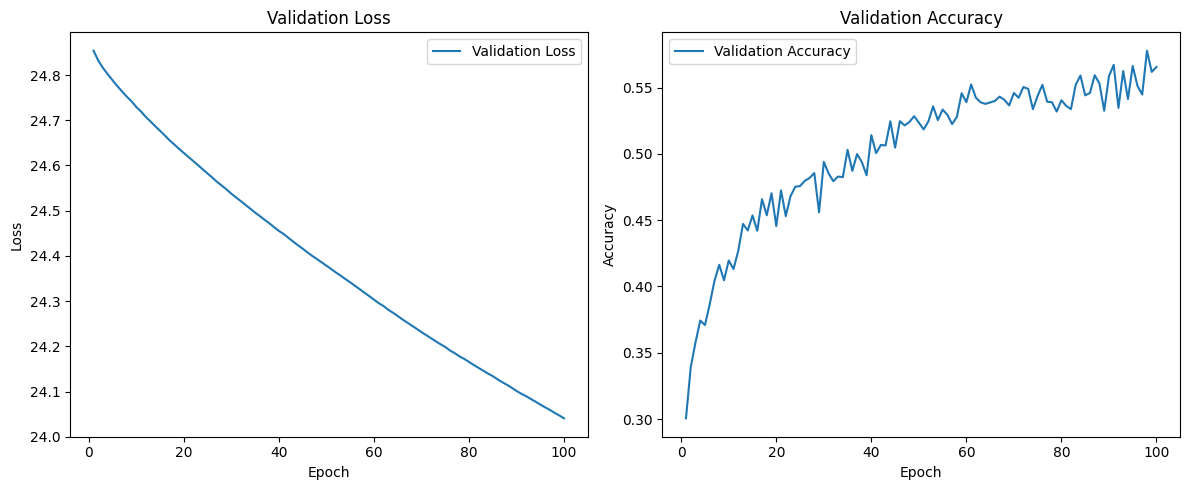

optimal p is:  0.0


In [33]:
# p choose parameters:
p_max_value = p[0]
p_max_accuracy = 0
for p_value in p:
    print("p: ", p_value)
    model = NeuralNetwork(input_size, hidden_size[0], output_size, learning_rate=lr_max_value, reg_strength=reg_max_value, p=p_value)
    val_loss_history, val_acc_history = model.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=batch_sizes[0])
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    if val_acc_history[-1] > p_max_accuracy:
        p_max_accuracy = val_acc_history[-1]
        p_max_value = p_value
print ("optimal p is: ", p_max_value)



Optimal paramter p for dropout in NN Model is P = 0

hidden_size:  20
Epoch 1/100, Validation Loss: 24.2902,  Epoch 1/100, Validation Accuracy: 0.6107
Epoch 2/100, Validation Loss: 24.2550,  Epoch 2/100, Validation Accuracy: 0.6473
Epoch 3/100, Validation Loss: 24.2301,  Epoch 3/100, Validation Accuracy: 0.6734
Epoch 4/100, Validation Loss: 24.2102,  Epoch 4/100, Validation Accuracy: 0.6894
Epoch 5/100, Validation Loss: 24.1937,  Epoch 5/100, Validation Accuracy: 0.7009
Epoch 6/100, Validation Loss: 24.1787,  Epoch 6/100, Validation Accuracy: 0.7100
Epoch 7/100, Validation Loss: 24.1647,  Epoch 7/100, Validation Accuracy: 0.7171
Epoch 8/100, Validation Loss: 24.1517,  Epoch 8/100, Validation Accuracy: 0.7262
Epoch 9/100, Validation Loss: 24.1394,  Epoch 9/100, Validation Accuracy: 0.7325
Epoch 10/100, Validation Loss: 24.1276,  Epoch 10/100, Validation Accuracy: 0.7371
Epoch 11/100, Validation Loss: 24.1164,  Epoch 11/100, Validation Accuracy: 0.7425
Epoch 12/100, Validation Loss: 24.1055,  Epoch 12/100, Validation Accuracy: 0.7486
Epoch

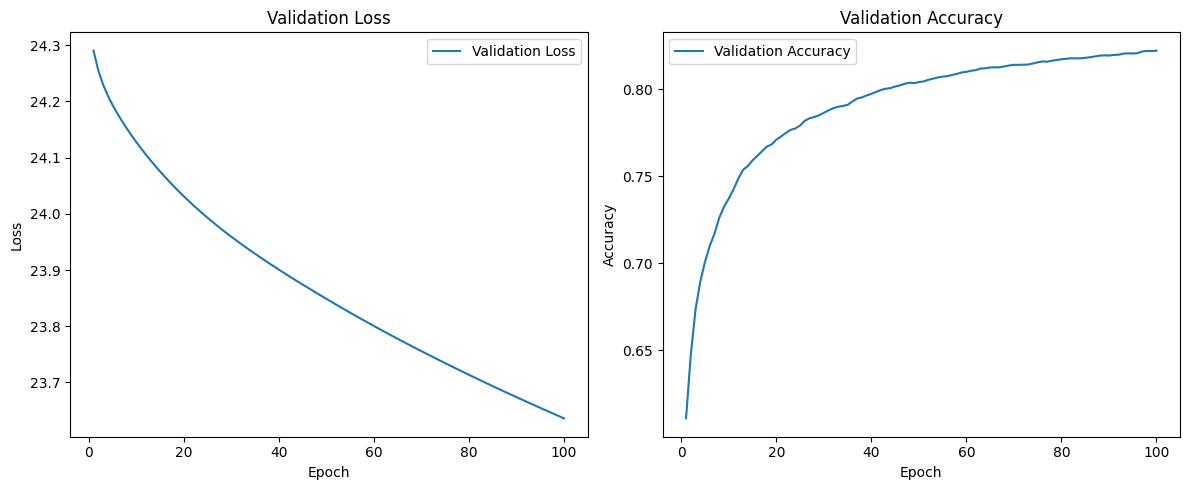

hidden_size:  50
Epoch 1/100, Validation Loss: 61.7197,  Epoch 1/100, Validation Accuracy: 0.6847
Epoch 2/100, Validation Loss: 61.6465,  Epoch 2/100, Validation Accuracy: 0.7168
Epoch 3/100, Validation Loss: 61.6043,  Epoch 3/100, Validation Accuracy: 0.7380
Epoch 4/100, Validation Loss: 61.5736,  Epoch 4/100, Validation Accuracy: 0.7498
Epoch 5/100, Validation Loss: 61.5495,  Epoch 5/100, Validation Accuracy: 0.7572
Epoch 6/100, Validation Loss: 61.5292,  Epoch 6/100, Validation Accuracy: 0.7625
Epoch 7/100, Validation Loss: 61.5116,  Epoch 7/100, Validation Accuracy: 0.7688
Epoch 8/100, Validation Loss: 61.4959,  Epoch 8/100, Validation Accuracy: 0.7710
Epoch 9/100, Validation Loss: 61.4815,  Epoch 9/100, Validation Accuracy: 0.7751
Epoch 10/100, Validation Loss: 61.4683,  Epoch 10/100, Validation Accuracy: 0.7784
Epoch 11/100, Validation Loss: 61.4560,  Epoch 11/100, Validation Accuracy: 0.7822
Epoch 12/100, Validation Loss: 61.4445,  Epoch 12/100, Validation Accuracy: 0.7854
Epoch

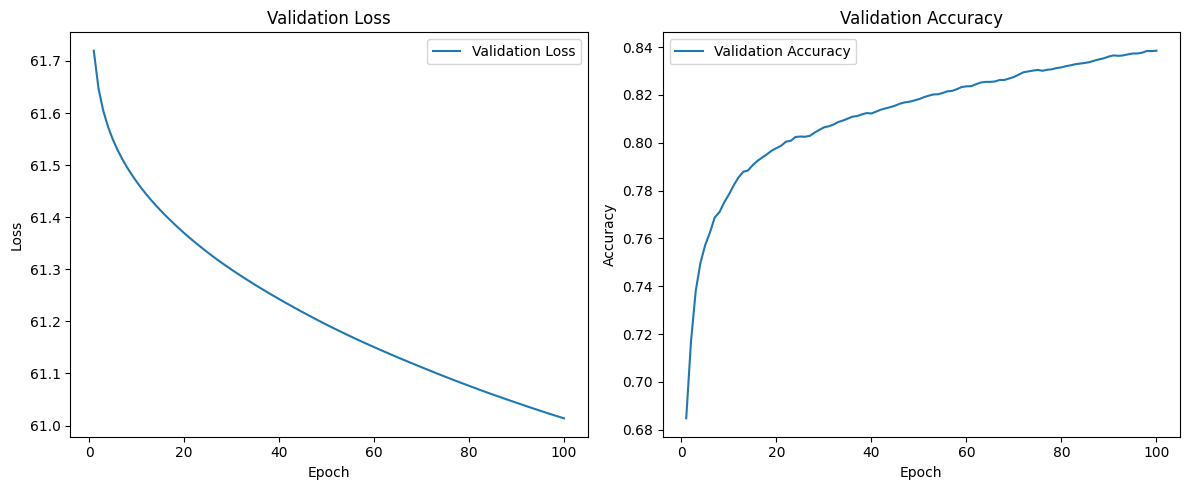

hidden_size:  100
Epoch 1/100, Validation Loss: 123.3962,  Epoch 1/100, Validation Accuracy: 0.7179
Epoch 2/100, Validation Loss: 123.2398,  Epoch 2/100, Validation Accuracy: 0.7412
Epoch 3/100, Validation Loss: 123.1549,  Epoch 3/100, Validation Accuracy: 0.7565
Epoch 4/100, Validation Loss: 123.0957,  Epoch 4/100, Validation Accuracy: 0.7654
Epoch 5/100, Validation Loss: 123.0501,  Epoch 5/100, Validation Accuracy: 0.7741
Epoch 6/100, Validation Loss: 123.0126,  Epoch 6/100, Validation Accuracy: 0.7788
Epoch 7/100, Validation Loss: 122.9807,  Epoch 7/100, Validation Accuracy: 0.7838
Epoch 8/100, Validation Loss: 122.9528,  Epoch 8/100, Validation Accuracy: 0.7876
Epoch 9/100, Validation Loss: 122.9279,  Epoch 9/100, Validation Accuracy: 0.7901
Epoch 10/100, Validation Loss: 122.9054,  Epoch 10/100, Validation Accuracy: 0.7921
Epoch 11/100, Validation Loss: 122.8850,  Epoch 11/100, Validation Accuracy: 0.7930
Epoch 12/100, Validation Loss: 122.8661,  Epoch 12/100, Validation Accuracy:

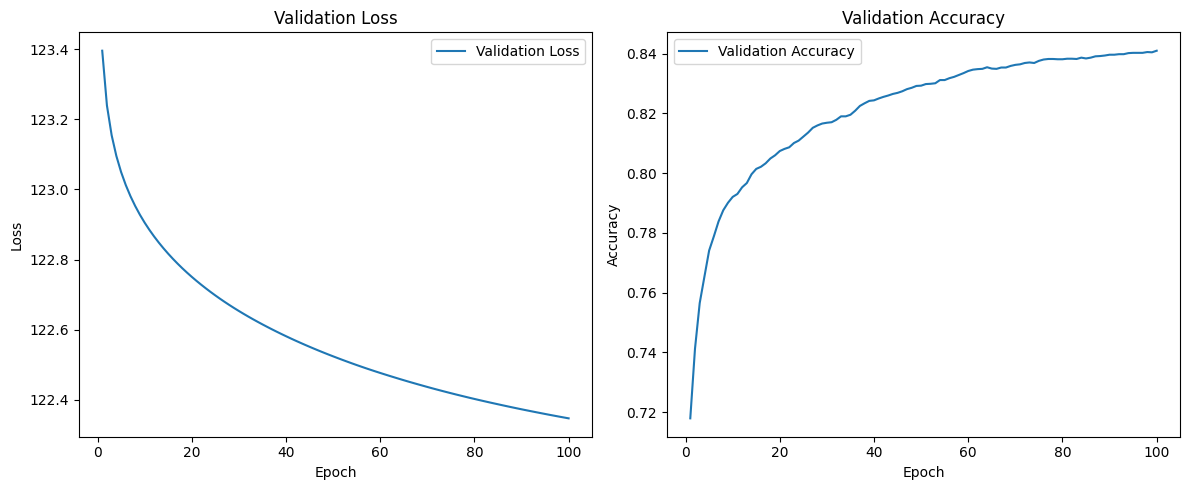

optimal hidden_size is:  100


In [35]:
# hidden_size choose parameters:
hidden_max_value = hidden_size[0]
hidden_max_accuracy = 0
for hidden in hidden_size:
    print("hidden_size: ", hidden)
    model = NeuralNetwork(input_size, hidden, output_size, learning_rate=lr_max_value, reg_strength=reg_max_value, p=p_max_value)
    val_loss_history, val_acc_history = model.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=batch_sizes[0])
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    if val_acc_history[-1] > hidden_max_accuracy:
        hidden_max_accuracy = val_acc_history[-1]
        hidden_max_value = hidden
print ("optimal hidden_size is: ", hidden_max_value)


Optimal paramter Hidden Size in NN Model is hidden_size  :  100

activation_function:  relu
Epoch 1/100, Validation Loss: 123.1583,  Epoch 1/100, Validation Accuracy: 0.7076
Epoch 2/100, Validation Loss: 123.0055,  Epoch 2/100, Validation Accuracy: 0.7309
Epoch 3/100, Validation Loss: 122.9241,  Epoch 3/100, Validation Accuracy: 0.7460
Epoch 4/100, Validation Loss: 122.8693,  Epoch 4/100, Validation Accuracy: 0.7557
Epoch 5/100, Validation Loss: 122.8280,  Epoch 5/100, Validation Accuracy: 0.7614
Epoch 6/100, Validation Loss: 122.7947,  Epoch 6/100, Validation Accuracy: 0.7691
Epoch 7/100, Validation Loss: 122.7667,  Epoch 7/100, Validation Accuracy: 0.7735
Epoch 8/100, Validation Loss: 122.7424,  Epoch 8/100, Validation Accuracy: 0.7790
Epoch 9/100, Validation Loss: 122.7209,  Epoch 9/100, Validation Accuracy: 0.7828
Epoch 10/100, Validation Loss: 122.7014,  Epoch 10/100, Validation Accuracy: 0.7866
Epoch 11/100, Validation Loss: 122.6835,  Epoch 11/100, Validation Accuracy: 0.7892
Epoch 12/100, Validation Loss: 122.6670,  Epoch 12/100, Validation 

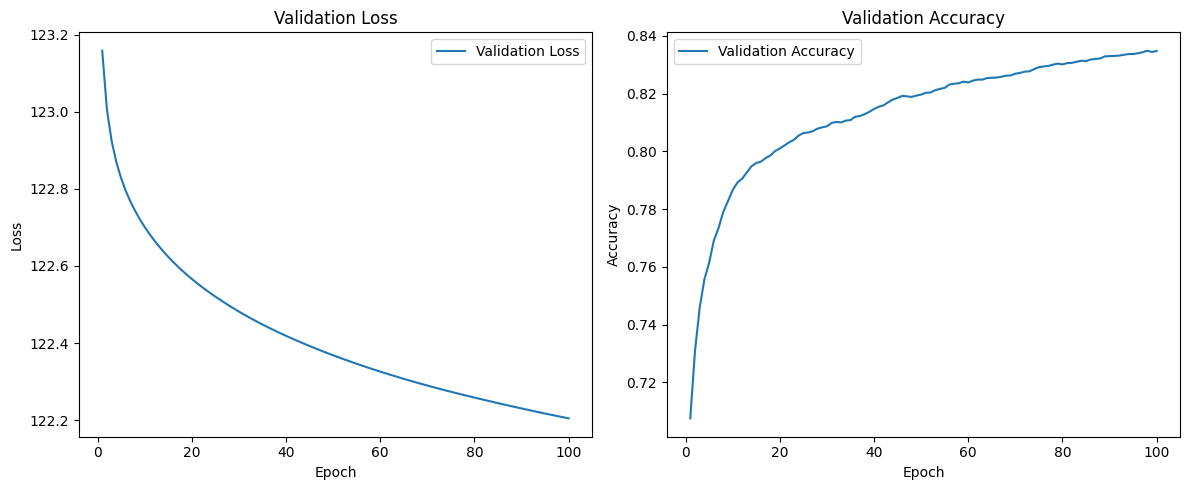

activation_function:  sigmoid
Epoch 1/100, Validation Loss: 123.9404,  Epoch 1/100, Validation Accuracy: 0.7618
Epoch 2/100, Validation Loss: 124.3593,  Epoch 2/100, Validation Accuracy: 0.7896
Epoch 3/100, Validation Loss: 124.7835,  Epoch 3/100, Validation Accuracy: 0.8005
Epoch 4/100, Validation Loss: 125.2056,  Epoch 4/100, Validation Accuracy: 0.8034
Epoch 5/100, Validation Loss: 125.6610,  Epoch 5/100, Validation Accuracy: 0.8079
Epoch 6/100, Validation Loss: 126.1980,  Epoch 6/100, Validation Accuracy: 0.8120
Epoch 7/100, Validation Loss: 126.8024,  Epoch 7/100, Validation Accuracy: 0.8114
Epoch 8/100, Validation Loss: 127.5130,  Epoch 8/100, Validation Accuracy: 0.8114
Epoch 9/100, Validation Loss: 128.4899,  Epoch 9/100, Validation Accuracy: 0.8090
Epoch 10/100, Validation Loss: 129.9208,  Epoch 10/100, Validation Accuracy: 0.8066
Epoch 11/100, Validation Loss: 132.0924,  Epoch 11/100, Validation Accuracy: 0.8049
Epoch 12/100, Validation Loss: 135.6520,  Epoch 12/100, Validati

C:\Users\USER\AppData\Local\Temp\ipykernel_484\1030922013.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 14/100, Validation Loss: 171.2403,  Epoch 14/100, Validation Accuracy: 0.7364
Epoch 15/100, Validation Loss: 224.6846,  Epoch 15/100, Validation Accuracy: 0.7277
Epoch 16/100, Validation Loss: 301.4509,  Epoch 16/100, Validation Accuracy: 0.7227
Epoch 17/100, Validation Loss: 381.6737,  Epoch 17/100, Validation Accuracy: 0.7121


C:\Users\USER\AppData\Local\Temp\ipykernel_484\1030922013.py:85: RuntimeWarning: divide by zero encountered in log
  corect_logprobs = -np.log(probs[range(num_examples), np.argmax(y, axis=1)])


Epoch 18/100, Validation Loss: inf,  Epoch 18/100, Validation Accuracy: 0.7180
Epoch 19/100, Validation Loss: inf,  Epoch 19/100, Validation Accuracy: 0.7146
Epoch 20/100, Validation Loss: inf,  Epoch 20/100, Validation Accuracy: 0.7125
Epoch 21/100, Validation Loss: inf,  Epoch 21/100, Validation Accuracy: 0.6904
Epoch 22/100, Validation Loss: inf,  Epoch 22/100, Validation Accuracy: 0.6707
Epoch 23/100, Validation Loss: inf,  Epoch 23/100, Validation Accuracy: 0.6646
Epoch 24/100, Validation Loss: inf,  Epoch 24/100, Validation Accuracy: 0.6770
Epoch 25/100, Validation Loss: inf,  Epoch 25/100, Validation Accuracy: 0.6479
Epoch 26/100, Validation Loss: inf,  Epoch 26/100, Validation Accuracy: 0.6497
Epoch 27/100, Validation Loss: inf,  Epoch 27/100, Validation Accuracy: 0.6678
Epoch 28/100, Validation Loss: inf,  Epoch 28/100, Validation Accuracy: 0.6724
Epoch 29/100, Validation Loss: inf,  Epoch 29/100, Validation Accuracy: 0.6765
Epoch 30/100, Validation Loss: inf,  Epoch 30/100, V

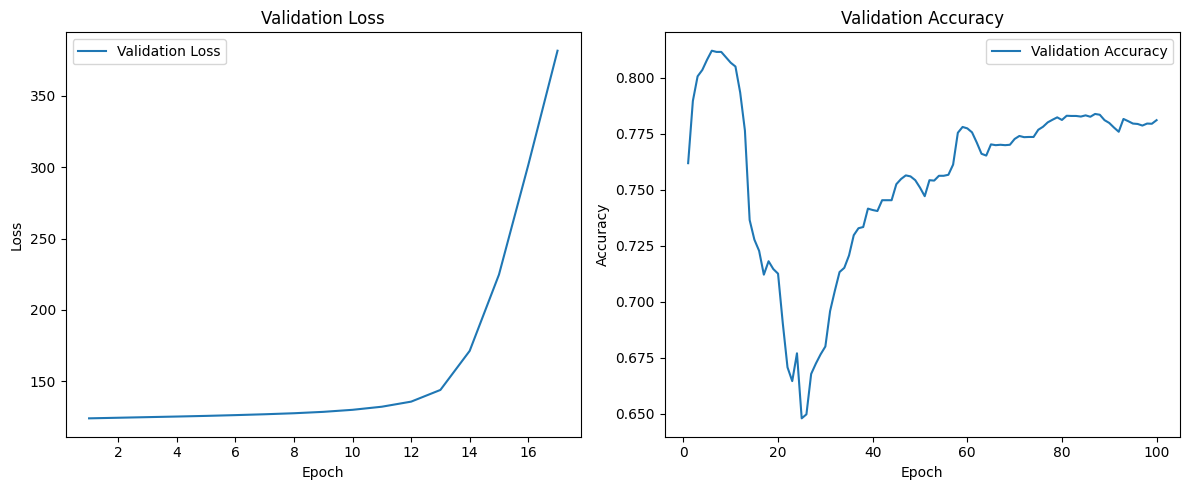

activation_function:  tanh
Epoch 1/100, Validation Loss: inf,  Epoch 1/100, Validation Accuracy: 0.6250
Epoch 2/100, Validation Loss: inf,  Epoch 2/100, Validation Accuracy: 0.6579
Epoch 3/100, Validation Loss: inf,  Epoch 3/100, Validation Accuracy: 0.6954
Epoch 4/100, Validation Loss: inf,  Epoch 4/100, Validation Accuracy: 0.6997
Epoch 5/100, Validation Loss: inf,  Epoch 5/100, Validation Accuracy: 0.6987
Epoch 6/100, Validation Loss: inf,  Epoch 6/100, Validation Accuracy: 0.7288
Epoch 7/100, Validation Loss: inf,  Epoch 7/100, Validation Accuracy: 0.7354
Epoch 8/100, Validation Loss: inf,  Epoch 8/100, Validation Accuracy: 0.7384
Epoch 9/100, Validation Loss: inf,  Epoch 9/100, Validation Accuracy: 0.7414
Epoch 10/100, Validation Loss: inf,  Epoch 10/100, Validation Accuracy: 0.7397
Epoch 11/100, Validation Loss: inf,  Epoch 11/100, Validation Accuracy: 0.7471
Epoch 12/100, Validation Loss: inf,  Epoch 12/100, Validation Accuracy: 0.7509
Epoch 13/100, Validation Loss: inf,  Epoch 

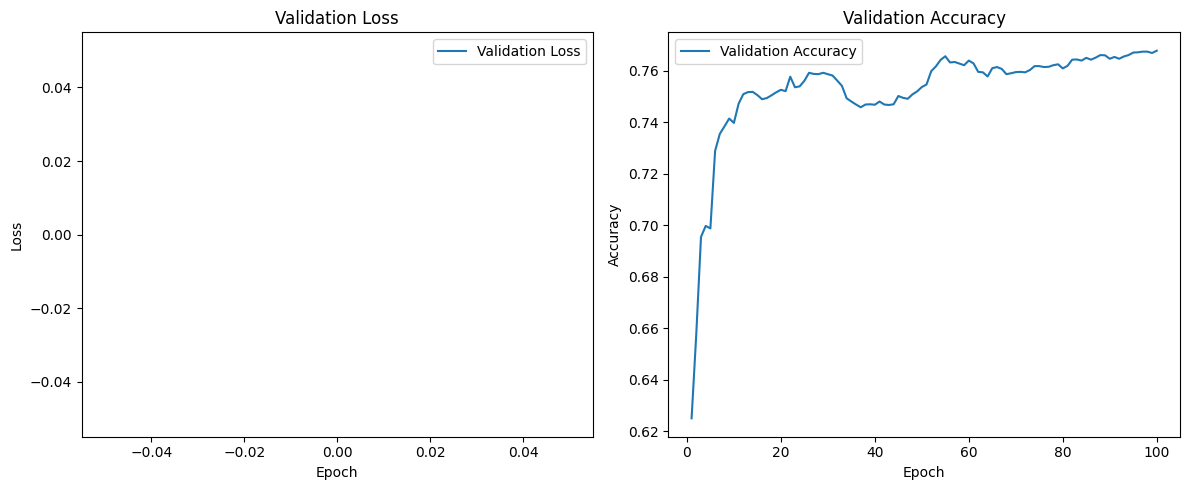

optimal activation_function is:  relu


In [36]:
# activation_functions choose parameters:
activation_functions_max_value = activation_functions[0]
activation_functions_max_accuracy = 0
for activation_function in activation_functions:
    print("activation_function: ", activation_function.__name__)
    model = NeuralNetwork(input_size, hidden_max_value, output_size, learning_rate=lr_max_value, reg_strength=reg_max_value, p=p_max_value, activation_function = activation_function)
    val_loss_history, val_acc_history = model.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=batch_sizes[0])
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    if val_acc_history[-1] > activation_functions_max_accuracy:
        activation_functions_max_accuracy = val_acc_history[-1]
        activation_functions_max_value = activation_function
print ("optimal activation_function is: ", activation_functions_max_value.__name__)

Optimal paramter Activation function in NN Model  is activation_function :  relu

batch size:  64
Epoch 1/100, Validation Loss: 123.6244,  Epoch 1/100, Validation Accuracy: 0.7113
Epoch 2/100, Validation Loss: 123.4797,  Epoch 2/100, Validation Accuracy: 0.7311
Epoch 3/100, Validation Loss: 123.3991,  Epoch 3/100, Validation Accuracy: 0.7465
Epoch 4/100, Validation Loss: 123.3420,  Epoch 4/100, Validation Accuracy: 0.7554
Epoch 5/100, Validation Loss: 123.2973,  Epoch 5/100, Validation Accuracy: 0.7588
Epoch 6/100, Validation Loss: 123.2602,  Epoch 6/100, Validation Accuracy: 0.7643
Epoch 7/100, Validation Loss: 123.2283,  Epoch 7/100, Validation Accuracy: 0.7702
Epoch 8/100, Validation Loss: 123.2002,  Epoch 8/100, Validation Accuracy: 0.7729
Epoch 9/100, Validation Loss: 123.1749,  Epoch 9/100, Validation Accuracy: 0.7754
Epoch 10/100, Validation Loss: 123.1520,  Epoch 10/100, Validation Accuracy: 0.7786
Epoch 11/100, Validation Loss: 123.1311,  Epoch 11/100, Validation Accuracy: 0.7818
Epoch 12/100, Validation Loss: 123.1116,  Epoch 12/100, Validation Accuracy: 0

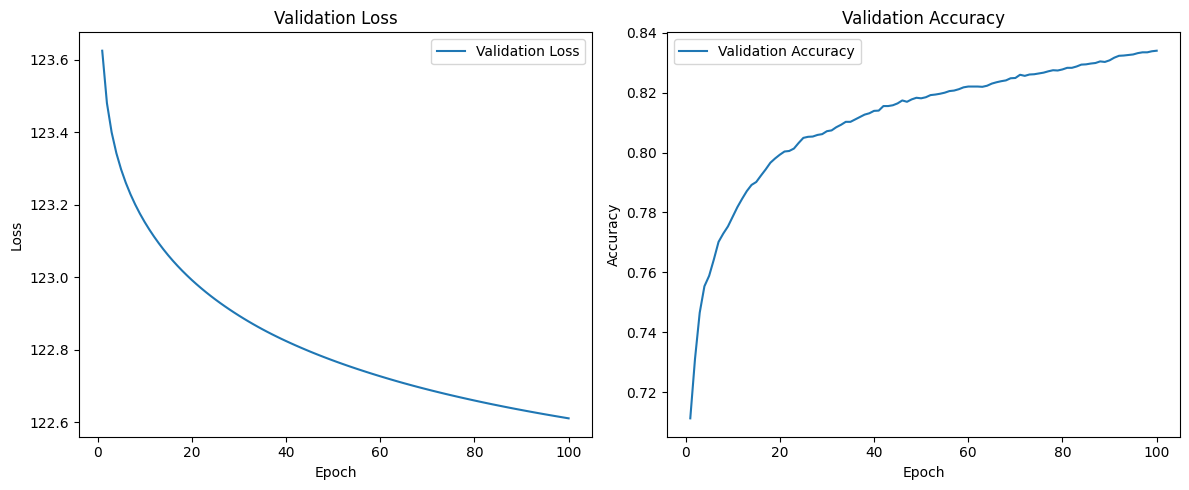

batch size:  512
Epoch 1/100, Validation Loss: 15.4857,  Epoch 1/100, Validation Accuracy: 0.6634
Epoch 2/100, Validation Loss: 15.4637,  Epoch 2/100, Validation Accuracy: 0.7038
Epoch 3/100, Validation Loss: 15.4495,  Epoch 3/100, Validation Accuracy: 0.7063
Epoch 4/100, Validation Loss: 15.4388,  Epoch 4/100, Validation Accuracy: 0.7091
Epoch 5/100, Validation Loss: 15.4304,  Epoch 5/100, Validation Accuracy: 0.7109
Epoch 6/100, Validation Loss: 15.4236,  Epoch 6/100, Validation Accuracy: 0.7279
Epoch 7/100, Validation Loss: 15.4183,  Epoch 7/100, Validation Accuracy: 0.7288
Epoch 8/100, Validation Loss: 15.4138,  Epoch 8/100, Validation Accuracy: 0.7246
Epoch 9/100, Validation Loss: 15.4100,  Epoch 9/100, Validation Accuracy: 0.7271
Epoch 10/100, Validation Loss: 15.4067,  Epoch 10/100, Validation Accuracy: 0.7339
Epoch 11/100, Validation Loss: 15.4038,  Epoch 11/100, Validation Accuracy: 0.7392
Epoch 12/100, Validation Loss: 15.4012,  Epoch 12/100, Validation Accuracy: 0.7430
Epoch

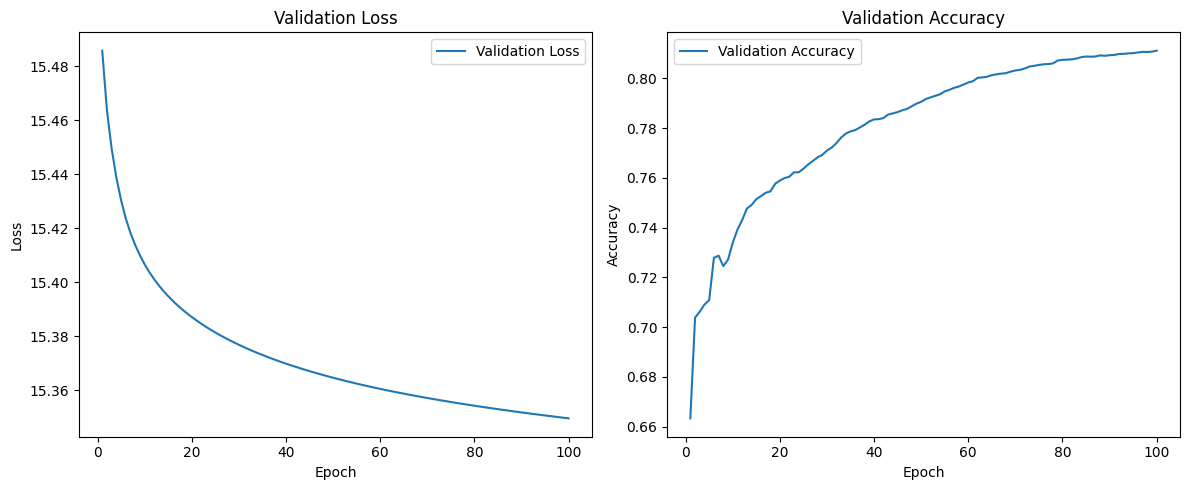

batch size:  2048
Epoch 1/100, Validation Loss: 3.9021,  Epoch 1/100, Validation Accuracy: 0.5207
Epoch 2/100, Validation Loss: 3.8972,  Epoch 2/100, Validation Accuracy: 0.6035
Epoch 3/100, Validation Loss: 3.8944,  Epoch 3/100, Validation Accuracy: 0.6322
Epoch 4/100, Validation Loss: 3.8923,  Epoch 4/100, Validation Accuracy: 0.6604
Epoch 5/100, Validation Loss: 3.8906,  Epoch 5/100, Validation Accuracy: 0.6710
Epoch 6/100, Validation Loss: 3.8891,  Epoch 6/100, Validation Accuracy: 0.6663
Epoch 7/100, Validation Loss: 3.8879,  Epoch 7/100, Validation Accuracy: 0.6721
Epoch 8/100, Validation Loss: 3.8868,  Epoch 8/100, Validation Accuracy: 0.6764
Epoch 9/100, Validation Loss: 3.8858,  Epoch 9/100, Validation Accuracy: 0.6839
Epoch 10/100, Validation Loss: 3.8849,  Epoch 10/100, Validation Accuracy: 0.6883
Epoch 11/100, Validation Loss: 3.8841,  Epoch 11/100, Validation Accuracy: 0.6927
Epoch 12/100, Validation Loss: 3.8833,  Epoch 12/100, Validation Accuracy: 0.6928
Epoch 13/100, Va

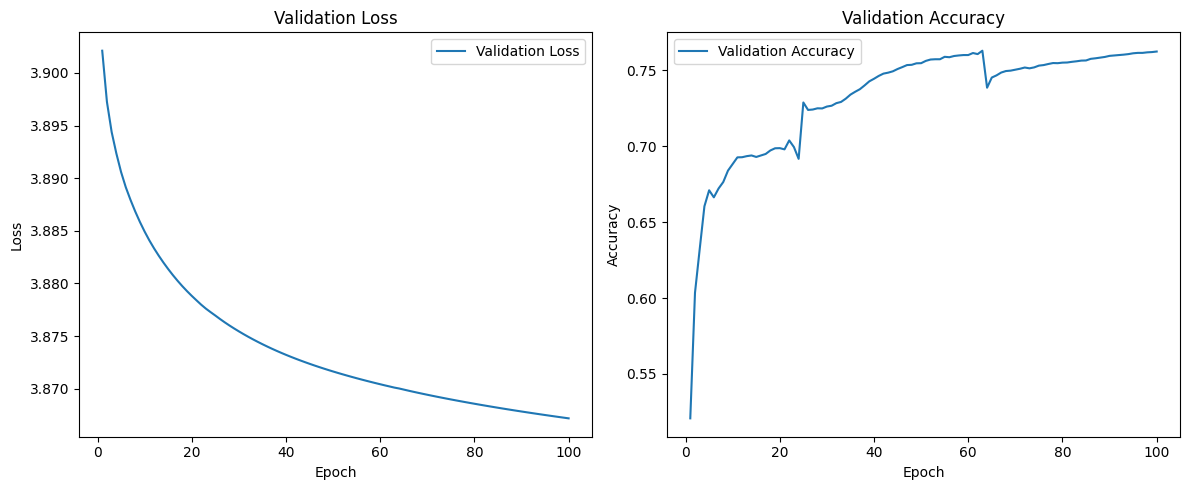

optimal batch size is:  64


In [37]:
# batch size choose parameters:
batch_size_max_value = batch_sizes[0]
batch_size_max_accuracy = 0 
for batch_size in batch_sizes:
    print("batch size: ", batch_size)
    model = NeuralNetwork(input_size, hidden, output_size, learning_rate=lr_max_value, reg_strength=reg_max_value, p=p_max_value, activation_function = activation_functions_max_value)
    val_loss_history, val_acc_history = model.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=batch_size)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    if val_acc_history[-1] > batch_size_max_accuracy:
        batch_size_max_accuracy = val_acc_history[-1]
        batch_size_max_value = batch_size
print ("optimal batch size is: ", batch_size_max_value)

Optimal paramter Btach Size in NN Model is batch size :  64

In [54]:
# Part 3 - Section C -  show the combination of the best hyperparamters and the result.

optimal lerning rate is:  0.05 , optimal reg_strength is:  0.1
optimal p is:  0.0 , optimal hidden_size is:  100
optimal activation_function is:  relu , optimal batch size:  64
Epoch 1/400, Validation Loss: 122.6468,  Epoch 1/400, Validation Accuracy: 0.7067
Epoch 2/400, Validation Loss: 122.5013,  Epoch 2/400, Validation Accuracy: 0.7304
Epoch 3/400, Validation Loss: 122.4195,  Epoch 3/400, Validation Accuracy: 0.7467
Epoch 4/400, Validation Loss: 122.3617,  Epoch 4/400, Validation Accuracy: 0.7579
Epoch 5/400, Validation Loss: 122.3168,  Epoch 5/400, Validation Accuracy: 0.7645
Epoch 6/400, Validation Loss: 122.2800,  Epoch 6/400, Validation Accuracy: 0.7691
Epoch 7/400, Validation Loss: 122.2485,  Epoch 7/400, Validation Accuracy: 0.7762
Epoch 8/400, Validation Loss: 122.2211,  Epoch 8/400, Validation Accuracy: 0.7793
Epoch 9/400, Validation Loss: 122.1967,  Epoch 9/400, Validation Accuracy: 0.7832
Epoch 10/400, Validation Loss: 122.1745,  Epoch 10/400, Validation Accuracy: 0.7855
E

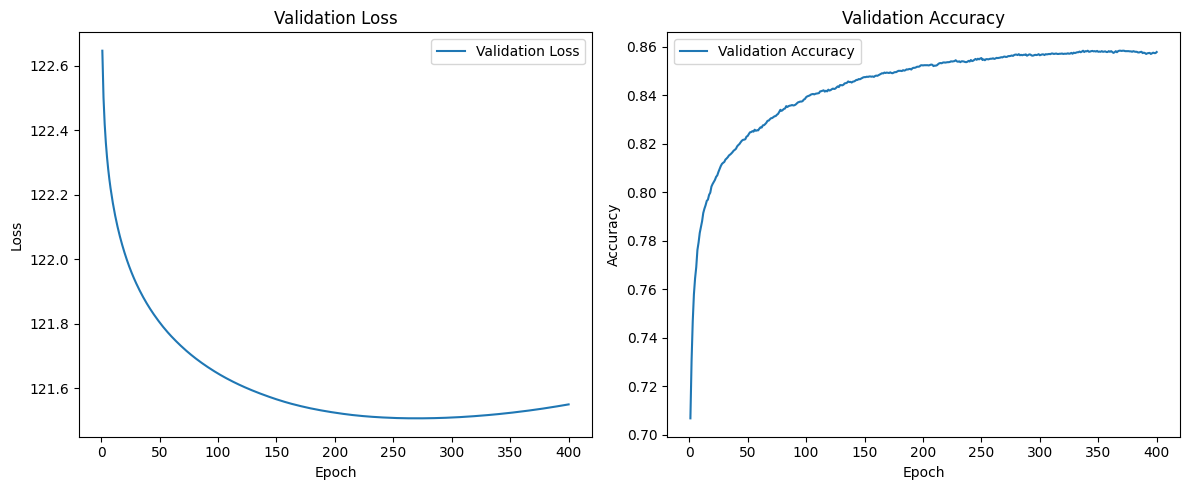

In [39]:
# optimal parameters:
print ("optimal lerning rate is: ", lr_max_value, ", optimal reg_strength is: ", reg_max_value)
print("optimal p is: ", p_max_value, ", optimal hidden_size is: ", hidden_max_value)
print ("optimal activation_function is: ", activation_functions_max_value.__name__, ", optimal batch size: " ,batch_size_max_value)
model = NeuralNetwork(input_size, hidden_max_value, output_size, learning_rate=lr_max_value, reg_strength=reg_max_value, p=p_max_value, activation_function=activation_functions_max_value)
val_loss_history, val_acc_history = model.train(X_train, y_train, X_val, y_val, epochs=400, batch_size=batch_size_max_value)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on test set
predictions = model.predict(test_data_features.values)

# Save predictions to a file
np.savetxt('NN_pred.csv', predictions, fmt='%d')

Optimal Solution in NN model by grid paramter learnings